# Business Objectives

<hr>
#### In order to determine whether to approve the loan, reduce its amount, charge riskier applicants a higher interest rate, etc., this case study looks for trends that indicate whether a client is having trouble completing their payments. This will guarantee that only loan applicants who can repay the loan will be allowed. This case study's goal is to find such applications by using EDA.

#### In other words, the organisation aims to comprehend the traits, also known as the driving factors (or driver variables) behind loan default, that are accurate predictors of default. The company can utilise this information for portfolio management and risk analysis.
<hr/>

##### Important Necessary Libraries

In [1]:
import pandas as pd
import numpy as npa
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns ; sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import statistics
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('float_format','{:.2f}'.format)


## Read the data set
<hr>

In [12]:

import pandas as pd
import numpy as npa
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns ; sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import statistics
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('float_format','{:.2f}'.format)

application_data = pd.read_csv(r"D:\New folder\Data Science\application_data.csv")
previous_application = pd.read_csv(r"D:\New folder\Data Science\previous_application.csv")

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0

In [13]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,NaN,607500.00,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,NaN,112500.00,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,NaN,450000.00,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,NaN,337500.00,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## OPERATION ON APPLICATION DATA SET 
#### CHECKING DATA SET 
<hr/>

In [4]:
application_data.shape

(307511, 122)

In [5]:
previous_application.shape

(1670214, 37)

In [6]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.00,0.38,0.40,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.

In [7]:
# Categorical data
cat_columns = application_data.select_dtypes(['object', 'category']).columns
cat_columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [8]:
# Continuous Data
cont_columns = application_data.select_dtypes(['int', 'float']).columns

for cont in cont_columns:
    print(cont)

SK_ID_CURR
TARGET
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVIN

In [9]:
application_data.info(verbose=True)  # There are ncontinuous and categorical data types present in data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

## Data Cleansing

#### Missing Value Treatment
<hr>

In [10]:
# Converting into percentage and sorting missing values descending order

Missing_in_application_data = (application_data.isnull().sum()/len(application_data.index))*100
Missing_in_application_data.sort_values(ascending=False).head(50)


COMMONAREA_MEDI                69.87
COMMONAREA_AVG                 69.87
COMMONAREA_MODE                69.87
NONLIVINGAPARTMENTS_MODE       69.43
NONLIVINGAPARTMENTS_AVG        69.43
NONLIVINGAPARTMENTS_MEDI       69.43
FONDKAPREMONT_MODE             68.39
LIVINGAPARTMENTS_MODE          68.35
LIVINGAPARTMENTS_AVG           68.35
LIVINGAPARTMENTS_MEDI          68.35
FLOORSMIN_AVG                  67.85
FLOORSMIN_MODE                 67.85
FLOORSMIN_MEDI                 67.85
YEARS_BUILD_MEDI               66.50
YEARS_BUILD_MODE               66.50
YEARS_BUILD_AVG                66.50
OWN_CAR_AGE                    65.99
LANDAREA_MEDI                  59.38
LANDAREA_MODE                  59.38
LANDAREA_AVG                   59.38
BASEMENTAREA_MEDI              58.52
BASEMENTAREA_AVG               58.52
BASEMENTAREA_MODE              58.52
EXT_SOURCE_1                   56.38
NONLIVINGAREA_MODE             55.18
NONLIVINGAREA_AVG              55.18
NONLIVINGAREA_MEDI             55.18
E

In [11]:
application_data.info(verbose=True)  # There are ncontinuous and categorical data types present in data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

## Handling Missing Values
<hr/>

#### There are many columns that have missing values in excess of 40%. Since mean, median, and mode make up the majority of the missing data, we are unable to analyse or impute these variables. Other columns that can be used for analysis have a considerably lower number of missing values.

#### More columns, including "EXT_SOURCE_1," "EXT_SOURCE_2," and "EXT_SOURCE_3," were dropped because they had null values that were more than 50% of the time; after dropping EXT_SOURCE_1, there was no logc in keeping EXT_SOURCE_2, and dropping these values. 


In [12]:
# There are 49 columns which have to be dropped out of 122
application_data = application_data.loc[:,Missing_in_application_data<40]

In [13]:
length = len(application_data.index)

In [14]:
(application_data.isnull().sum()/len(application_data)*100).sort_values(ascending = False).head(20)

OCCUPATION_TYPE              31.35
EXT_SOURCE_3                 19.83
AMT_REQ_CREDIT_BUREAU_YEAR   13.50
AMT_REQ_CREDIT_BUREAU_QRT    13.50
AMT_REQ_CREDIT_BUREAU_MON    13.50
AMT_REQ_CREDIT_BUREAU_WEEK   13.50
AMT_REQ_CREDIT_BUREAU_DAY    13.50
AMT_REQ_CREDIT_BUREAU_HOUR   13.50
NAME_TYPE_SUITE               0.42
OBS_30_CNT_SOCIAL_CIRCLE      0.33
DEF_30_CNT_SOCIAL_CIRCLE      0.33
OBS_60_CNT_SOCIAL_CIRCLE      0.33
DEF_60_CNT_SOCIAL_CIRCLE      0.33
EXT_SOURCE_2                  0.21
AMT_GOODS_PRICE               0.09
AMT_ANNUITY                   0.00
CNT_FAM_MEMBERS               0.00
DAYS_LAST_PHONE_CHANGE        0.00
FLAG_DOCUMENT_17              0.00
FLAG_DOCUMENT_18              0.00
dtype: float64

In [15]:
application_data.shape

(307511, 73)

# DROPPING FLAG COLUMNS RELATED TO SINCE THEY ARE THE INFORMATION PROVIDED ARE NOT LIKE PHONE NUMBER, ADDRESS, DOCUMENTS #### DROPPING OTHER COLUMNS 
#### REGION RATING CAN ALSO BE DROPPED IF THE REGION DOES NOT HAVE APPLICABLE VALUE FOR APPRAISAL
#### Social circle columns may also be removed, and (4) as all flag data is of binary value, it may be removed.

In [16]:
#these coluns are required in analysis as there no clear information regarding what are these documents i.e all ae boolean 0 0r 1
unwanted_columns = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
        'FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL',
                'REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',"EXT_SOURCE_2","EXT_SOURCE_3",
               "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]
application_data = application_data.drop(unwanted_columns,axis=1)

In [17]:
new_null = (application_data.isnull().sum()/len(application_data)*100).sort_values(ascending=False)

In [18]:
new_null[new_null>0]

OCCUPATION_TYPE              31.35
AMT_REQ_CREDIT_BUREAU_YEAR   13.50
AMT_REQ_CREDIT_BUREAU_QRT    13.50
AMT_REQ_CREDIT_BUREAU_MON    13.50
AMT_REQ_CREDIT_BUREAU_WEEK   13.50
AMT_REQ_CREDIT_BUREAU_DAY    13.50
AMT_REQ_CREDIT_BUREAU_HOUR   13.50
NAME_TYPE_SUITE               0.42
AMT_GOODS_PRICE               0.09
AMT_ANNUITY                   0.00
CNT_FAM_MEMBERS               0.00
DAYS_LAST_PHONE_CHANGE        0.00
dtype: float64

In [19]:
# Categorical data
cat_columns = application_data.select_dtypes(['object', 'category']).columns
cat_columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [20]:
# Continuous Data
cont_columns = application_data.select_dtypes(['int', 'float']).columns

for cont in cont_columns:
    print(cont)

SK_ID_CURR
TARGET
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
CNT_FAM_MEMBERS
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
DAYS_LAST_PHONE_CHANGE
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR


## Let's anlalyse column one by one
#### OCCUPATION_TYPE               31.35 
#### EXT_SOURCE_3                  19.83
#### AMT_REQ_CREDIT_BUREAU_YEAR    13.50
#### AMT_REQ_CREDIT_BUREAU_QRT     13.50
#### AMT_REQ_CREDIT_BUREAU_MON     13.50
#### AMT_REQ_CREDIT_BUREAU_WEEK    13.50
#### AMT_REQ_CREDIT_BUREAU_DAY     13.50
#### AMT_REQ_CREDIT_BUREAU_HOUR    13.50 
<hr/>

## OCCUPATION_TYPE
<hr/>

OCCUPATION_TYPE column may provide some relevant insights despite having 31% of its values missing. The data will be distorted if the missing values are substituted with the mode Labourers because it is a categorical variable. Therefore, we won't treat the missing value in this case and will just let it alone.

In [21]:
application_data["OCCUPATION_TYPE"].info

<bound method Series.info of 0            Laborers
1          Core staff
2            Laborers
3            Laborers
4          Core staff
             ...     
307506    Sales staff
307507            NaN
307508       Managers
307509       Laborers
307510       Laborers
Name: OCCUPATION_TYPE, Length: 307511, dtype: object>

In [22]:
application_data.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

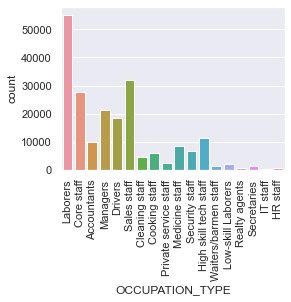

In [23]:
plt.figure(figsize=(4,3))
sns.countplot(data = application_data, x = 'OCCUPATION_TYPE')
plt.xticks(rotation=90)
plt.show()

In [24]:
# WE WILL BE REPLACING THE MISSING VALUES WITH Laborers SINCE THIS IS MOST FREQUENT
application_data.OCCUPATION_TYPE.mode()[0] 

'Laborers'

In [25]:
application_data.OCCUPATION_TYPE.fillna(application_data.OCCUPATION_TYPE.mode()[0],inplace=True)

In [26]:
# CHECKING THE NULL VALUES 
new_null=application_data.isnull().sum().sort_values(ascending=False)/length * 100
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_YEAR   13.50
AMT_REQ_CREDIT_BUREAU_QRT    13.50
AMT_REQ_CREDIT_BUREAU_MON    13.50
AMT_REQ_CREDIT_BUREAU_WEEK   13.50
AMT_REQ_CREDIT_BUREAU_DAY    13.50
AMT_REQ_CREDIT_BUREAU_HOUR   13.50
NAME_TYPE_SUITE               0.42
AMT_GOODS_PRICE               0.09
AMT_ANNUITY                   0.00
CNT_FAM_MEMBERS               0.00
DAYS_LAST_PHONE_CHANGE        0.00
dtype: float64

## CHEKING VALUE WITH LESS THAN 1%
<hr/>

## NAME_TYPE_SUITE
<hr/>

In [27]:
## CATEGORICAL DATA HENCE WE WILL USE MODE TO FILL THE MISSING VALUES 
application_data.NAME_TYPE_SUITE.describe()   

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [28]:
application_data.NAME_TYPE_SUITE.value_counts()   

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [29]:
application_data.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

Most frequent data is Unaccompanied,  Replacing it with null values using fillna

In [30]:
application_data.NAME_TYPE_SUITE.fillna(application_data.NAME_TYPE_SUITE.mode()[0],inplace=True)

In [31]:
# CHECKING THE NULL VALUES 
new_null=application_data.isnull().sum().sort_values(ascending=False)/length * 100
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_YEAR   13.50
AMT_REQ_CREDIT_BUREAU_HOUR   13.50
AMT_REQ_CREDIT_BUREAU_QRT    13.50
AMT_REQ_CREDIT_BUREAU_MON    13.50
AMT_REQ_CREDIT_BUREAU_WEEK   13.50
AMT_REQ_CREDIT_BUREAU_DAY    13.50
AMT_GOODS_PRICE               0.09
AMT_ANNUITY                   0.00
CNT_FAM_MEMBERS               0.00
DAYS_LAST_PHONE_CHANGE        0.00
dtype: float64

## AMT_GOODS_PRICE
<hr/>

In [32]:
# Continuous Data 
application_data.AMT_GOODS_PRICE.describe()                # We can replace it with median 

count    307233.00
mean     538396.21
std      369446.46
min       40500.00
25%      238500.00
50%      450000.00
75%      679500.00
max     4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

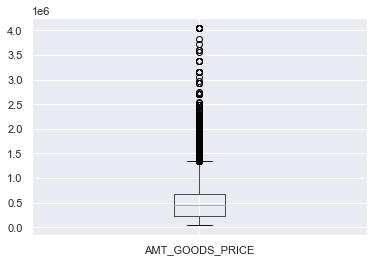

In [33]:
application_data.boxplot(column=["AMT_GOODS_PRICE"])    
#  REPALCING IT WITH MEDIAN since the perccentage value of median is low comparing to mean 
plt.show()

#### We are replace continuous data null values through median because in data has some outliers 

In [34]:
application_data.AMT_GOODS_PRICE.fillna(application_data.AMT_GOODS_PRICE.median(),inplace=True)

In [35]:
new_null=application_data.isnull().sum().sort_values(ascending=False)/length * 100
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_YEAR   13.50
AMT_REQ_CREDIT_BUREAU_QRT    13.50
AMT_REQ_CREDIT_BUREAU_MON    13.50
AMT_REQ_CREDIT_BUREAU_WEEK   13.50
AMT_REQ_CREDIT_BUREAU_DAY    13.50
AMT_REQ_CREDIT_BUREAU_HOUR   13.50
AMT_ANNUITY                   0.00
CNT_FAM_MEMBERS               0.00
DAYS_LAST_PHONE_CHANGE        0.00
dtype: float64

## AMT_ANNUITY
<hr/>

In [36]:
application_data.AMT_ANNUITY.describe()

count   307499.00
mean     27108.57
std      14493.74
min       1615.50
25%      16524.00
50%      24903.00
75%      34596.00
max     258025.50
Name: AMT_ANNUITY, dtype: float64

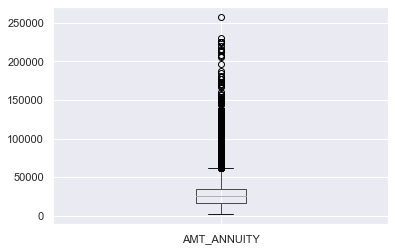

In [37]:
application_data.boxplot(column=["AMT_ANNUITY"]);

In [38]:
# FILLING THE MISSING VALUES WITH MEDIAN
application_data.AMT_ANNUITY.fillna(application_data.AMT_ANNUITY.median(),inplace=True)

In [39]:
# Checking the null values 
new_null=application_data.isnull().sum().sort_values(ascending=False)/length * 100
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_YEAR   13.50
AMT_REQ_CREDIT_BUREAU_QRT    13.50
AMT_REQ_CREDIT_BUREAU_MON    13.50
AMT_REQ_CREDIT_BUREAU_WEEK   13.50
AMT_REQ_CREDIT_BUREAU_DAY    13.50
AMT_REQ_CREDIT_BUREAU_HOUR   13.50
CNT_FAM_MEMBERS               0.00
DAYS_LAST_PHONE_CHANGE        0.00
dtype: float64

## CNT_FAM_MEMBERS
<hr/>

In [40]:
application_data.CNT_FAM_MEMBERS.describe()

count   307509.00
mean         2.15
std          0.91
min          1.00
25%          2.00
50%          2.00
75%          3.00
max         20.00
Name: CNT_FAM_MEMBERS, dtype: float64

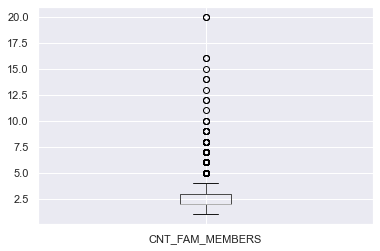

In [41]:
application_data.boxplot(column=["CNT_FAM_MEMBERS"]);

In [42]:
# FILLING THE MISSING VALUES WITH MEDIAN
application_data.CNT_FAM_MEMBERS.fillna(application_data.CNT_FAM_MEMBERS.median(), inplace = True)

In [43]:
# Checking the null values 
new_null=application_data.isnull().sum().sort_values(ascending=False)/length * 100
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_YEAR   13.50
AMT_REQ_CREDIT_BUREAU_QRT    13.50
AMT_REQ_CREDIT_BUREAU_MON    13.50
AMT_REQ_CREDIT_BUREAU_WEEK   13.50
AMT_REQ_CREDIT_BUREAU_DAY    13.50
AMT_REQ_CREDIT_BUREAU_HOUR   13.50
DAYS_LAST_PHONE_CHANGE        0.00
dtype: float64

## DAYS_LAST_PHONE_CHANGE
<hr/>

In [44]:
application_data.DAYS_LAST_PHONE_CHANGE.describe()

count   307510.00
mean      -962.86
std        826.81
min      -4292.00
25%      -1570.00
50%       -757.00
75%       -274.00
max          0.00
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [45]:
application_data.DAYS_LAST_PHONE_CHANGE = abs(application_data.DAYS_LAST_PHONE_CHANGE)

In [46]:
application_data.DAYS_LAST_PHONE_CHANGE.describe()

count   307510.00
mean       962.86
std        826.81
min          0.00
25%        274.00
50%        757.00
75%       1570.00
max       4292.00
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [47]:
application_data.DAYS_LAST_PHONE_CHANGE.fillna(application_data.DAYS_LAST_PHONE_CHANGE.median(), inplace=True)

In [48]:
# Checking the null values 
new_null=application_data.isnull().sum().sort_values(ascending=False)/length * 100
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_YEAR   13.50
AMT_REQ_CREDIT_BUREAU_QRT    13.50
AMT_REQ_CREDIT_BUREAU_MON    13.50
AMT_REQ_CREDIT_BUREAU_WEEK   13.50
AMT_REQ_CREDIT_BUREAU_DAY    13.50
AMT_REQ_CREDIT_BUREAU_HOUR   13.50
dtype: float64

## FILLING ALL THE 13% VALUE WITH MEDIAN
<hr/>

## AMT_REQ_CREDIT_BUREAU_YEAR
<hr/>

In [49]:
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count   265992.00
mean         1.90
std          1.87
min          0.00
25%          0.00
50%          1.00
75%          3.00
max         25.00
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

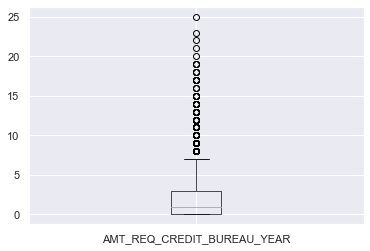

In [50]:
application_data.boxplot(column=["AMT_REQ_CREDIT_BUREAU_YEAR"]);

In [51]:
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(application_data.AMT_REQ_CREDIT_BUREAU_YEAR.median(), inplace=True)

In [52]:
# Checking the null values 
new_null=application_data.isnull().sum().sort_values(ascending=False)/length * 100
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_QRT    13.50
AMT_REQ_CREDIT_BUREAU_MON    13.50
AMT_REQ_CREDIT_BUREAU_WEEK   13.50
AMT_REQ_CREDIT_BUREAU_DAY    13.50
AMT_REQ_CREDIT_BUREAU_HOUR   13.50
dtype: float64

## AMT_REQ_CREDIT_BUREAU_QRT
<hr/>

In [53]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count   265992.00
mean         0.27
std          0.79
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        261.00
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

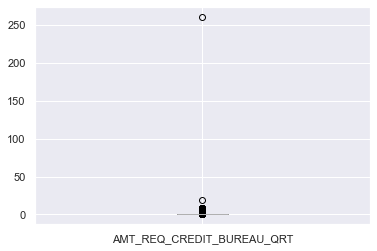

In [54]:
application_data.boxplot(["AMT_REQ_CREDIT_BUREAU_QRT"]);

In [55]:
# Replace it with median
application_data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(application_data.AMT_REQ_CREDIT_BUREAU_QRT.median(), inplace = True)

In [56]:
# Checking the null values 
new_null=application_data.isnull().sum().sort_values(ascending=False)/length * 100
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_MON    13.50
AMT_REQ_CREDIT_BUREAU_WEEK   13.50
AMT_REQ_CREDIT_BUREAU_DAY    13.50
AMT_REQ_CREDIT_BUREAU_HOUR   13.50
dtype: float64

## AMT_REQ_CREDIT_BUREAU_MON
<hr/>

In [57]:
application_data.AMT_REQ_CREDIT_BUREAU_MON.describe()

count   265992.00
mean         0.27
std          0.92
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         27.00
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [58]:
# Replacing missing value with median
application_data.AMT_REQ_CREDIT_BUREAU_MON.fillna(application_data.AMT_REQ_CREDIT_BUREAU_MON.median(), inplace=True)

In [59]:
# Checking the null values 
new_null=application_data.isnull().sum().sort_values(ascending=False)/length * 100
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_WEEK   13.50
AMT_REQ_CREDIT_BUREAU_DAY    13.50
AMT_REQ_CREDIT_BUREAU_HOUR   13.50
dtype: float64

## AMT_REQ_CREDIT_BUREAU_WEEK
<hr/>

In [60]:
application_data.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count   265992.00
mean         0.03
std          0.20
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          8.00
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [61]:
# Replacing missing value with median
application_data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(application_data.AMT_REQ_CREDIT_BUREAU_WEEK.median(), inplace = True)

In [62]:
# Checking the null values 
new_null=application_data.isnull().sum().sort_values(ascending=False)/length * 100
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_DAY    13.50
AMT_REQ_CREDIT_BUREAU_HOUR   13.50
dtype: float64

## AMT_REQ_CREDIT_BUREAU_DAY
<hr/>

In [63]:
application_data.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count   265992.00
mean         0.01
std          0.11
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          9.00
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [64]:
# Replacing missing with null values
application_data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(application_data.AMT_REQ_CREDIT_BUREAU_DAY.median(), inplace=True)

In [65]:
# Checking the null values 
new_null=application_data.isnull().sum().sort_values(ascending=False)/length * 100
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_HOUR   13.50
dtype: float64

## AMT_REQ_CREDIT_BUREAU_HOUR
<hr/>

In [66]:
# Replacing missing with null values
application_data.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count   265992.00
mean         0.01
std          0.08
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          4.00
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [67]:
application_data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(application_data.AMT_REQ_CREDIT_BUREAU_HOUR.median(), inplace=True)

In [68]:
# Checking the null values 
new_null=application_data.isnull().sum().sort_values(ascending=False)/length * 100
new_null

SK_ID_CURR                    0.00
REG_CITY_NOT_WORK_CITY        0.00
CNT_FAM_MEMBERS               0.00
WEEKDAY_APPR_PROCESS_START    0.00
HOUR_APPR_PROCESS_START       0.00
REG_REGION_NOT_LIVE_REGION    0.00
REG_REGION_NOT_WORK_REGION    0.00
LIVE_REGION_NOT_WORK_REGION   0.00
REG_CITY_NOT_LIVE_CITY        0.00
LIVE_CITY_NOT_WORK_CITY       0.00
DAYS_ID_PUBLISH               0.00
ORGANIZATION_TYPE             0.00
DAYS_LAST_PHONE_CHANGE        0.00
AMT_REQ_CREDIT_BUREAU_HOUR    0.00
AMT_REQ_CREDIT_BUREAU_DAY     0.00
AMT_REQ_CREDIT_BUREAU_WEEK    0.00
AMT_REQ_CREDIT_BUREAU_MON     0.00
AMT_REQ_CREDIT_BUREAU_QRT     0.00
OCCUPATION_TYPE               0.00
DAYS_REGISTRATION             0.00
TARGET                        0.00
AMT_ANNUITY                   0.00
NAME_CONTRACT_TYPE            0.00
CODE_GENDER                   0.00
FLAG_OWN_CAR                  0.00
FLAG_OWN_REALTY               0.00
CNT_CHILDREN                  0.00
AMT_INCOME_TOTAL              0.00
AMT_CREDIT          

## --------------------------------------------------------------------------------------------------------------------

## Checking data types and outliers
<hr/>

# Since we discovered negative data types and it was a days data type, we checked it first before rechecking the data.

# verifying data variables because they contain negative values and use abs to convert them to positive values.

In [69]:
application_data.DAYS_ID_PUBLISH.describe()

count   307511.00
mean     -2994.20
std       1509.45
min      -7197.00
25%      -4299.00
50%      -3254.00
75%      -1720.00
max          0.00
Name: DAYS_ID_PUBLISH, dtype: float64

In [70]:
application_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION']] = abs(application_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION']])

In [71]:
## All Positive
application_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION
0,9461,637,2120,3648.00
1,16765,1188,291,1186.00
2,19046,225,2531,4260.00
3,19005,3039,2437,9833.00
4,19932,3038,3458,4311.00
...,...,...,...,...
307506,9327,236,1982,8456.00
307507,20775,365243,4090,4388.00
307508,14966,7921,5150,6737.00
307509,11961,4786,931,2562.00


◾ Converting all days into year days divide by 365 we are assuming all are not leap year for better understanding 

In [72]:
application_data["YEAR_BIRTH"] = application_data.DAYS_BIRTH / 365
application_data["YEAR_EMPLOYED"] = application_data.DAYS_EMPLOYED / 365
application_data["YEAR_ID_PUBLISH"] = application_data.DAYS_ID_PUBLISH / 365
application_data["YEAR_REGISTRATION"] = application_data.DAYS_REGISTRATION / 365
    

In [73]:
application_data[["YEAR_BIRTH", "YEAR_EMPLOYED", "YEAR_ID_PUBLISH", "YEAR_REGISTRATION"]]

,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_ID_PUBLISH,YEAR_REGISTRATION
0,25.92,1.75,5.81,9.99
1,45.93,3.25,0.80,3.25
2,52.18,0.62,6.93,11.67
3,52.07,8.33,6.68,26.94
4,54.61,8.32,9.47,11.81
...,...,...,...,...
307506,25.55,0.65,5.43,23.17
307507,56.92,1000.67,11.21,12.02
307508,41.00,21.70,14.11,18.46
307509,32.77,13.11,2.55,7.02


Drop all days columns now no need because now we have all years column

In [74]:
drop_days = application_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION']]

In [75]:
application_data.drop(drop_days, axis = 1, inplace=True)

In [76]:
application_data.shape

(307511, 39)

In [77]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEAR_BIRTH', 'YEAR_EMPLOYED',
       'YEAR_ID_PUBLISH', 'YEAR_REGISTRATION'],
      dtype='object

In [78]:
application_data.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [79]:
application_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

##### We have replaced with MOST FREQUENT VALUE FEMALE SINCE IT IS JUST 4 VLAUE IT WONT HAVE ANT EFECT ON THE DATA 

In [80]:
application_data.CODE_GENDER.replace("XNA", "F", inplace = True)

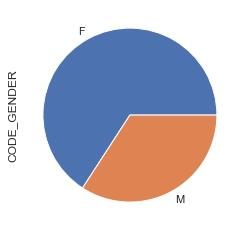

In [81]:
application_data.CODE_GENDER.value_counts().plot.pie();

### Observations:- Female candidates are exponentially very high as compare to the male

<AxesSubplot:>

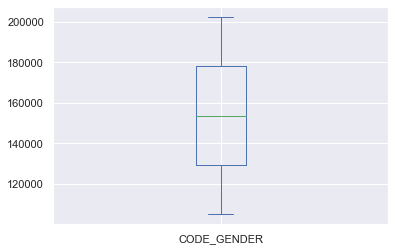

In [82]:
application_data.CODE_GENDER.value_counts().plot.box() # No otlier found the data is fine.

### Observatios:- For CODE_GENDER no outlier found in this data

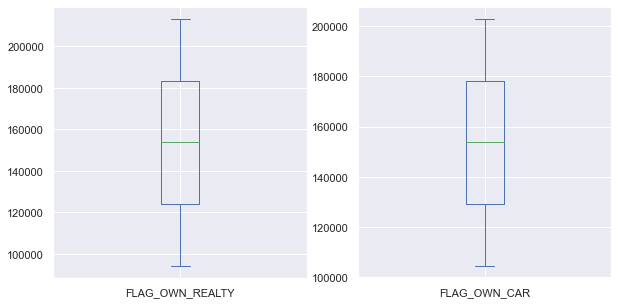

In [83]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
application_data.FLAG_OWN_REALTY.value_counts().plot.box();
plt.subplot(1,2,2)
application_data.FLAG_OWN_CAR.value_counts().plot.box();

Exploring CNT_CHILDREN

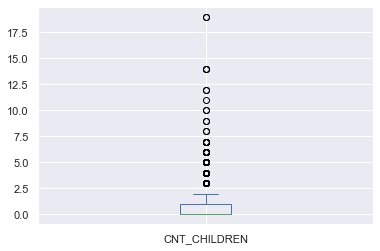

In [84]:
application_data.CNT_CHILDREN.plot.box()
plt.show()

In [85]:
application_data.CNT_CHILDREN > 2.5

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Name: CNT_CHILDREN, Length: 307511, dtype: bool

In [86]:
application_data.CNT_CHILDREN.describe()

count   307511.00
mean         0.42
std          0.72
min          0.00
25%          0.00
50%          0.00
75%          1.00
max         19.00
Name: CNT_CHILDREN, dtype: float64

In [87]:
application_data[application_data.CNT_CHILDREN<15].CNT_CHILDREN

0         0
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: CNT_CHILDREN, Length: 307509, dtype: int64

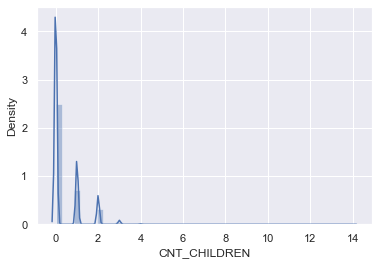

In [88]:
sns.distplot(application_data[application_data["CNT_CHILDREN"]<15].CNT_CHILDREN);

#### Inter Quartile Range

In [89]:
#UPPER= Q3+1.5*IQR
#lower=Q1-1.5*IQR
#Q3:- 75%TILE 
#Q1:- 25%TILE
#IQR=Q3-Q1
upper_bound=1.00+(1.5*0)
lower_bound=0+(1.5*0)
print(upper_bound)
print(lower_bound)

1.0
0.0


In [90]:
application_data.CNT_CHILDREN.skew()

1.9746044696947922

As per the data it is highly skewed

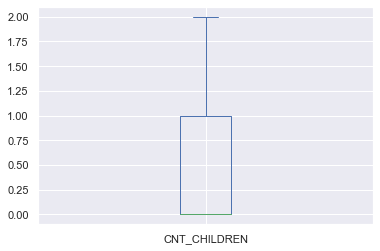

In [91]:
# Checking the max. count of children to be 3
application_data[application_data.CNT_CHILDREN < 3].CNT_CHILDREN.plot.box();

### Observation:- If we set below the count of children is 3 so no outliers were found

#### Exploring the column of AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE
#### ------------------------------------------------------------------------------------------------------------------------------------------------

In [92]:
application_data.AMT_INCOME_TOTAL.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
10%         81000.00
20%         99000.00
30%        112500.00
40%        135000.00
50%        147150.00
60%        162000.00
70%        180000.00
80%        225000.00
90%        270000.00
99%        472500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

Text(0.5, 1.0, 'TOTAL_INCOME_RANGE')

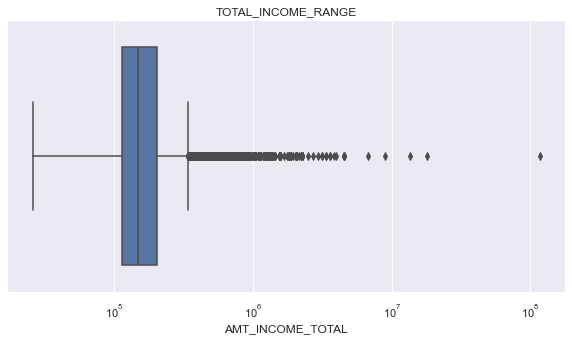

In [93]:
plt.figure(figsize=(10,5))
sns.boxplot(data=application_data, x = "AMT_INCOME_TOTAL", orient="v");
plt.xscale("log")
plt.title("TOTAL_INCOME_RANGE")

In [94]:
application_data[application_data["AMT_INCOME_TOTAL"] < application_data.AMT_INCOME_TOTAL.quantile(0.90)].AMT_INCOME_TOTAL

0        202500.00
2         67500.00
3        135000.00
4        121500.00
5         99000.00
            ...   
307506   157500.00
307507    72000.00
307508   153000.00
307509   171000.00
307510   157500.00
Name: AMT_INCOME_TOTAL, Length: 269523, dtype: float64

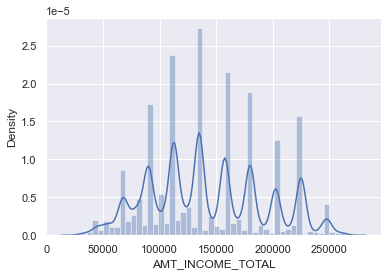

In [95]:
sns.distplot(application_data[application_data["AMT_INCOME_TOTAL"] < application_data.AMT_INCOME_TOTAL.quantile(0.90)].AMT_INCOME_TOTAL);

Text(0.5, 1.0, 'TOTAL_INCOME_RANGE')

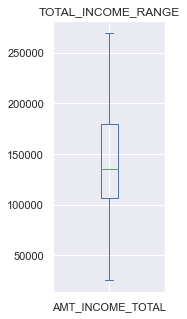

In [96]:
plt.figure(figsize=(2,5))
application_data[application_data["AMT_INCOME_TOTAL"] < application_data.AMT_INCOME_TOTAL.quantile(0.90)].AMT_INCOME_TOTAL.plot.box()
plt.title("TOTAL_INCOME_RANGE")

#### Outlier were found above 90th percentile

In [97]:
application_data.AMT_CREDIT.describe(percentiles=[0.8,0.9,0.95,0.99])

count    307511.00
mean     599026.00
std      402490.78
min       45000.00
50%      513531.00
80%      900000.00
90%     1133748.00
95%     1350000.00
99%     1854000.00
max     4050000.00
Name: AMT_CREDIT, dtype: float64

In [98]:
application_data[application_data["AMT_CREDIT"] < application_data["AMT_CREDIT"].quantile(0.99)].AMT_CREDIT

0         406597.50
1        1293502.50
2         135000.00
3         312682.50
4         513000.00
            ...    
307506    254700.00
307507    269550.00
307508    677664.00
307509    370107.00
307510    675000.00
Name: AMT_CREDIT, Length: 304434, dtype: float64

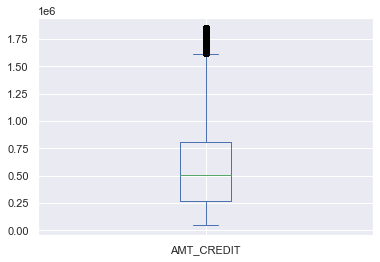

In [99]:
application_data[application_data["AMT_CREDIT"] < application_data["AMT_CREDIT"].quantile(0.99)].AMT_CREDIT.plot.box();

### Observation :- Outliers can be removed after setting the value upto 0.95 percentile 

In [100]:
application_data["AMT_CREDIT"].describe(percentiles=[0.8,0.9,0.95,0.99])

count    307511.00
mean     599026.00
std      402490.78
min       45000.00
50%      513531.00
80%      900000.00
90%     1133748.00
95%     1350000.00
99%     1854000.00
max     4050000.00
Name: AMT_CREDIT, dtype: float64

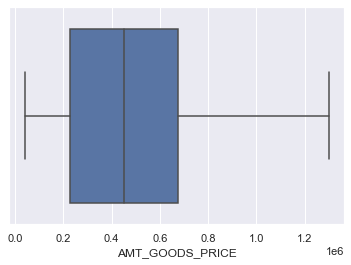

In [101]:
sns.boxplot(x=application_data[application_data["AMT_GOODS_PRICE"] < application_data["AMT_GOODS_PRICE"].quantile(0.95)].AMT_GOODS_PRICE);

### Observation :- Outliers can be removed after setting the value upto 0.95 percentile 

In [102]:
application_data["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

Note:- XNA to be replaced by not defined or unknown.

In [103]:
application_data["ORGANIZATION_TYPE"].replace("XNA", "UNKNOWN", inplace = True)

In [104]:
application_data.ORGANIZATION_TYPE

0         Business Entity Type 3
1                         School
2                     Government
3         Business Entity Type 3
4                       Religion
                   ...          
307506                  Services
307507                   UNKNOWN
307508                    School
307509    Business Entity Type 1
307510    Business Entity Type 3
Name: ORGANIZATION_TYPE, Length: 307511, dtype: object

In [105]:
application_data["BUSINESS_TYPE"] = application_data["ORGANIZATION_TYPE"].apply(lambda x : x.split()[0])

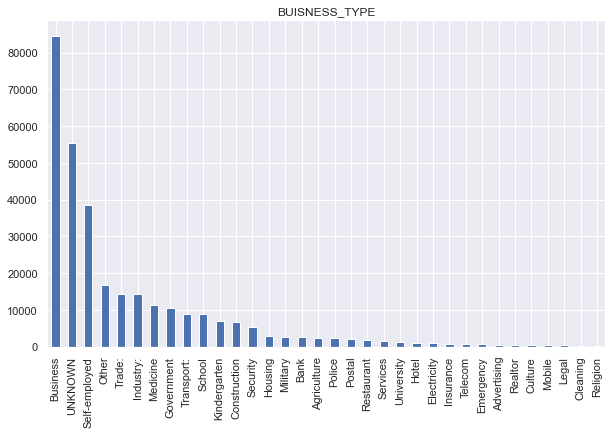

In [106]:
plt.figure(figsize=(10,6))

application_data.BUSINESS_TYPE.value_counts().plot.bar()
plt.title('BUISNESS_TYPE');


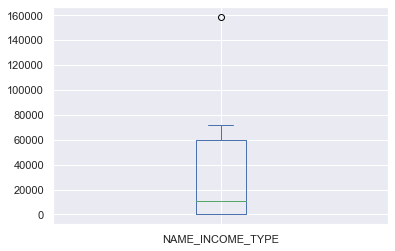

In [107]:
application_data.NAME_INCOME_TYPE.value_counts().plot.box();

### Observation :- Outliers identified which is at the max point 

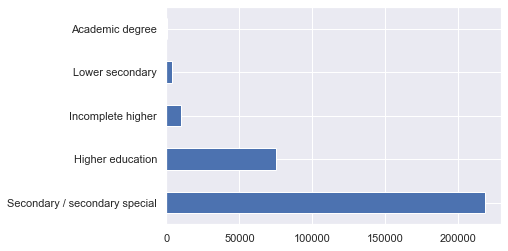

In [108]:
application_data["NAME_EDUCATION_TYPE"].value_counts().plot.barh();

### Observation:- Secondary Type of education are higest than other type of education. 

In [109]:
application_data.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [110]:
application_data[application_data.NAME_FAMILY_STATUS == "Widow"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_ID_PUBLISH,YEAR_REGISTRATION,BUSINESS_TYPE
18,100022,0,Revolving loans,F,N,Y,0,112500.00,157500.00,7875.00,157500.00,Other_A,Working,Secondary / secondary special,Widow,House / apartment,0.05,Laborers,1.00,FRIDAY,13,0,0,0,0,0,0,Housing,239.00,0.00,0.00,0.00,0.00,0.00,0.00,48.54,21.38,3.45,23.98,Housing
26,100031,1,Cash loans,F,N,Y,0,112500.00,979992.00,27076.50,702000.00,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.02,Cooking staff,1.00,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,161.00,0.00,0.00,0.00,0.00,2.00,2.00,51.30,7.20,5.01,18.01,Business
59,100070,0,Cash loans,M,Y,Y,0,540000.00,1227901.50,46899.00,1129500.00,Unaccompanied,Working,Higher education,Widow,House / apartment,0.03,Managers,1.00,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,1377.00,0.00,0.00,0.00,0.00,0.00,0.00,56.28,5.73,1.55,18.76,Business
74,100086,0,Cash loans,F,N,Y,1,135000.00,675000.00,21775.50,675000.00,Unaccompanied,Commercial associate,Higher education,Widow,House / apartment,0.02,Laborers,2.00,THURSDAY,12,0,0,0,0,0,0,Self-employed,1597.00,0.00,0.00,0.00,1.00,4.00,2.00,39.08,6.83,12.38,11.85,Self-employed
99,100118,0,Cash loans,F,N,Y,0,90000.00,675000.00,26541.00,675000.00,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.03,Laborers,1.00,TUESDAY,15,0,0,0,0,0,0,UNKNOWN,0.00,0.00,0.00,0.00,0.00,0.00,1.00,61.56,1000.67,11.84,0.59,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307402,456135,0,Revolving loans,F,N,Y,0,157500.00,382500.00,19125.00,382500.00,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.03,Laborers,1.00,TUESDAY,14,0,0,0,0,0,0,UNKNOWN,633.00,0.00,0.00,0.00,0.00,0.00,6.00,61.79,1000.67,11.10,0.16,UNKNOWN
307403,456136,0,Cash loans,F,N,Y,0,270000.00,254700.00,14751.00,225000.00,Unaccompanied,Commercial associate,Secondary / secondary special,Widow,House / apartment,0.03,Managers,1.00,SATURDAY,11,0,0,0,0,0,0,School,2897.00,0.00,0.00,0.00,1.00,0.00,3.00,66.26,8.12,11.50,18.07,School
307406,456139,0,Cash loans,F,N,Y,0,90000.00,203760.00,13747.50,180000.00,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.02,Laborers,1.00,MONDAY,14,0,0,0,0,0,0,UNKNOWN,1696.00,0.00,0.00,0.00,0.00,0.00,2.00,63.95,1000.67,10.91,21.65,UNKNOWN
307450,456188,0,Cash loans,F,N,Y,0,54000.00,315000.00,21924.00,315000.00,Unaccompanied,Pensioner,Secondary / secondary special,Widow,Municipal apartment,0.01,Laborers,1.00,WEDNESDAY,10,0,0,0,0,0,0,UNKNOWN,2950.00,0.00,0.00,0.00,0.00,0.00,1.00,55.79,1000.67,9.95,26.96,UNKNOWN


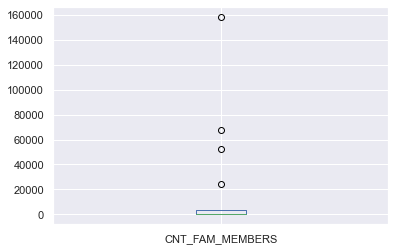

In [111]:
application_data.CNT_FAM_MEMBERS.value_counts().plot.box();

### Observation :- Few Outliers are found which at different points and maxium extends upto the 160000

In [112]:
application_data.CNT_FAM_MEMBERS.describe()

count   307511.00
mean         2.15
std          0.91
min          1.00
25%          2.00
50%          2.00
75%          3.00
max         20.00
Name: CNT_FAM_MEMBERS, dtype: float64

In [113]:
IQR = 3.00 - 2.00
print("    IQR     :-",  IQR)
UPPER_BOUND=3-(1.5*1)             #Q3+1.5*IQR
print("UPPER_BOUND :-", UPPER_BOUND)
LOWER_BOUND=2-(1.5*1)             #Q3+1.5*IQR
print("LOWER_BOUND :-", LOWER_BOUND)

    IQR     :- 1.0
UPPER_BOUND :- 1.5
LOWER_BOUND :- 0.5


Now CNT_FAM_MEMBERS IQR range defined   

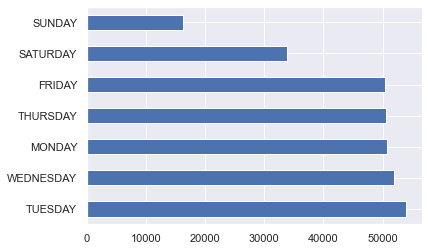

In [114]:
application_data.WEEKDAY_APPR_PROCESS_START.value_counts().plot.barh();

### Observation :- As per the bar chart Monday, Tuesdays & Wednesday are the time people are more apply for loan

# Univarient Analysis

In [115]:
application_data.TARGET.value_counts(normalize=True)*100

0   91.93
1    8.07
Name: TARGET, dtype: float64

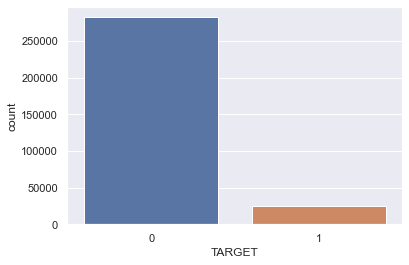

In [116]:
sns.countplot(data=application_data, x = "TARGET");

### Observation:- In this count plot defaulter target are very less.

In [117]:
application_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

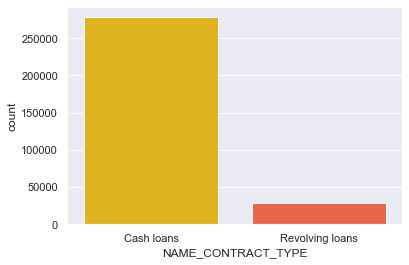

In [118]:
custom_palette = ["#FFC300", "#FF5733"]
sns.set_palette(custom_palette)
sns.countplot(data=application_data, x = "NAME_CONTRACT_TYPE");

### Observation:-  Cash Loan are more in comparison of revolving loan 

In [119]:
application_data.CODE_GENDER.value_counts(normalize=True)*100

F   65.84
M   34.16
Name: CODE_GENDER, dtype: float64

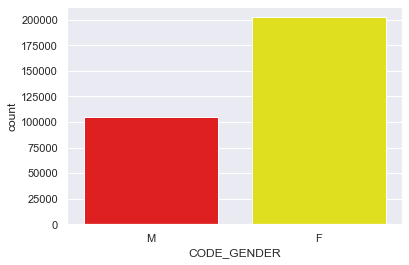

In [120]:
custom_palette = ["#FF0000", "#FFFF00"]
sns.set_palette(custom_palette)
sns.countplot(data = application_data, x = "CODE_GENDER");

### Observation:-  The number of female are more than numer of male taking the loan

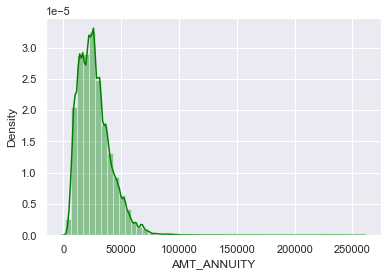

In [121]:
custom_palette = ["#008000", "#FFFF00"]
sns.set_palette(custom_palette)
sns.distplot(x = application_data["AMT_ANNUITY"])
plt.xlabel("AMT_ANNUITY");

In [122]:
application_data["AMT_ANNUITY"].skew()

1.5798237246955467

In [123]:
application_data["AMT_ANNUITY"].describe()

count   307511.00
mean     27108.49
std      14493.46
min       1615.50
25%      16524.00
50%      24903.00
75%      34596.00
max     258025.50
Name: AMT_ANNUITY, dtype: float64

### Observation :- The AMT_ANNUITY the maximum Density  is approx 25000  

In [124]:
application_data.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

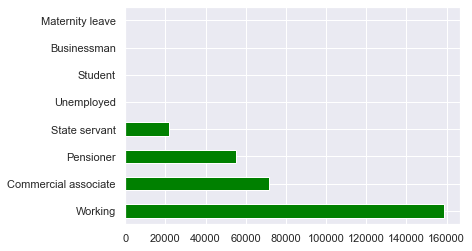

In [125]:
application_data.NAME_INCOME_TYPE.value_counts().plot.barh();

###  Observation : - Working category has more income than any other type of income 

In [126]:
application_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

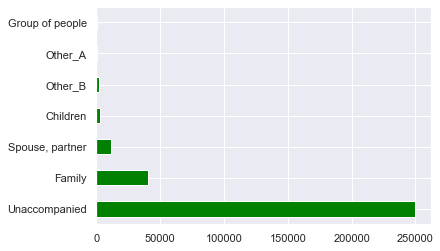

In [127]:
application_data.NAME_TYPE_SUITE.value_counts().plot.barh();

###  Observation : - Unaccompanied has more than other group

In [128]:
application_data.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

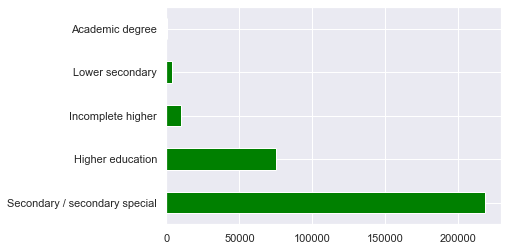

In [129]:
application_data.NAME_EDUCATION_TYPE.value_counts().plot.barh();

### Observation :- People with higher secondary school are more than others 

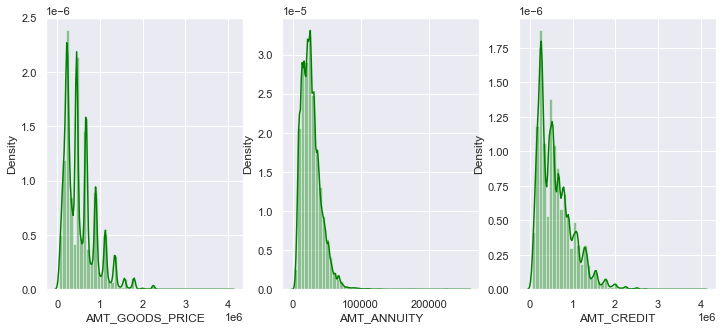

In [130]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.distplot(application_data["AMT_GOODS_PRICE"])

plt.subplot(1,3,2)

sns.distplot(application_data["AMT_ANNUITY"])

plt.subplot(1,3,3)

sns.distplot(application_data["AMT_CREDIT"]);

In [131]:
# Now we need to check skew
print(application_data["AMT_CREDIT"].skew())
print(application_data["AMT_ANNUITY"].skew())
print(application_data["AMT_GOODS_PRICE"].skew())

1.2347784971349398
1.5798237246955467
1.350142549635089


In [132]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEAR_BIRTH', 'YEAR_EMPLOYED',
       'YEAR_ID_PUBLISH', 'YEAR_REGISTRATION', 'BUSINESS_TYPE'],
  

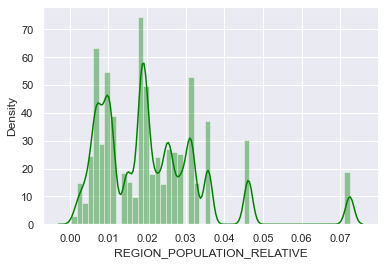

In [133]:
sns.distplot(application_data["REGION_POPULATION_RELATIVE"]);

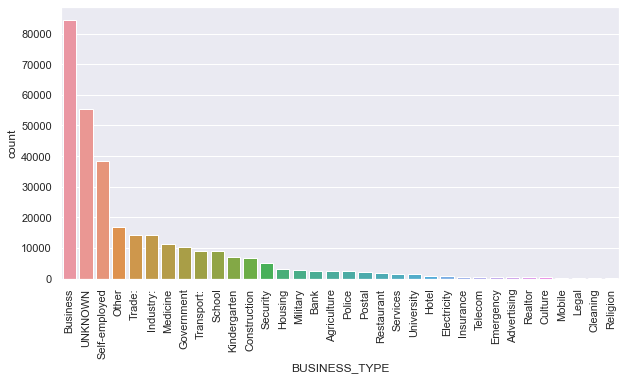

In [134]:
# Get the value counts of each category in descending order
category_counts = application_data['BUSINESS_TYPE'].value_counts().sort_values(ascending=False)
# Get the list of categories sorted by frequency
sorted_categories = category_counts.index.tolist()
# Create the countplot with the sorted categories
plt.figure(figsize=(10,5))
sns.countplot(application_data.BUSINESS_TYPE, order=sorted_categories)
plt.xticks(rotation = 90);

### Observation :- Buisness , Unknown and Self-Emoloyed are the top most occupation 

<AxesSubplot:xlabel='YEAR_BIRTH'>

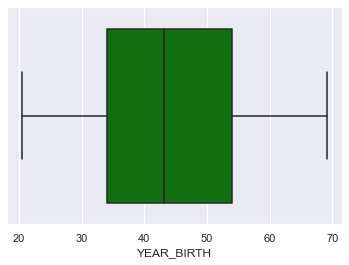

In [135]:
# Year_ of _ Birth 
sns.boxplot(application_data["YEAR_BIRTH"])   

    No outliers found in this data 

# Bivariant Analysis

In [136]:
 set(application_data.describe().columns)

{'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE',
 'HOUR_APPR_PROCESS_START',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'REGION_POPULATION_RELATIVE',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'SK_ID_CURR',
 'TARGET',
 'YEAR_BIRTH',
 'YEAR_EMPLOYED',
 'YEAR_ID_PUBLISH',
 'YEAR_REGISTRATION'}

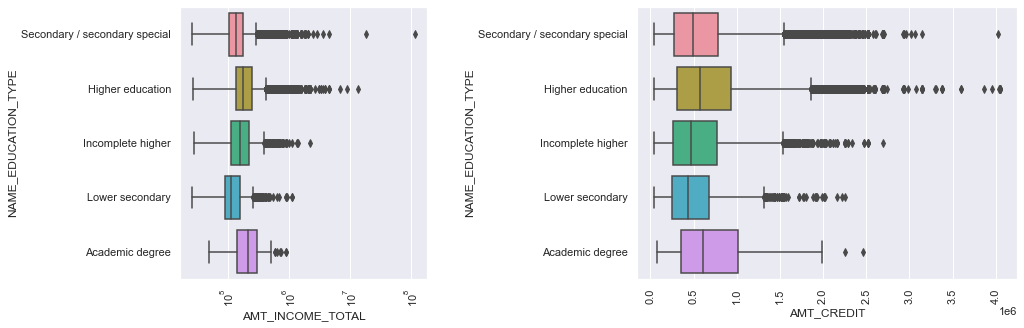

In [137]:
# NAME_EDUCATION_TYPE vs "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY"
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x="AMT_INCOME_TOTAL",y="NAME_EDUCATION_TYPE",data=application_data)
plt.xscale("log")
plt.xticks(rotation=90);
plt.subplot(1,2,2)
sns.boxplot(x="AMT_CREDIT",y="NAME_EDUCATION_TYPE",data=application_data)
plt.xticks(rotation=90);


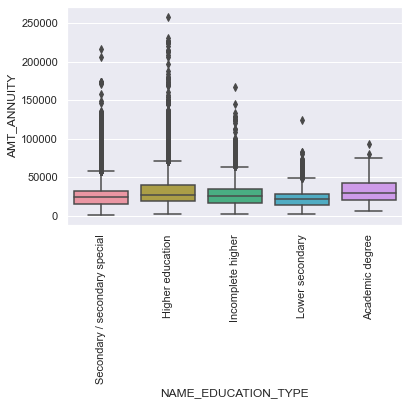

In [138]:
sns.boxplot(x="NAME_EDUCATION_TYPE",y="AMT_ANNUITY",data=application_data)
plt.xticks(rotation=90);

### Observation:- The Academic degree have more income where lower secondary people have lesser income

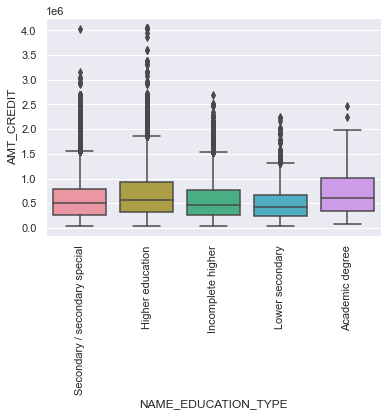

In [139]:
sns.boxplot(x="NAME_EDUCATION_TYPE",y="AMT_CREDIT",data=application_data)
plt.xticks(rotation=90);

### Observation:- AMT_CREDIT has Similar results as the above AMT_ANNUITY

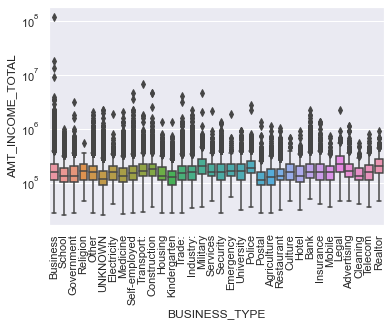

In [140]:
# AMT_INCOME_TOTAL vs Buisness_type
sns.boxplot(x="BUSINESS_TYPE",y="AMT_INCOME_TOTAL",data=application_data)
plt.yscale("log")
plt.xticks(rotation=90);

### Obervation :- Buisness, religion, construction ,military,legal are few occupation with high income range 

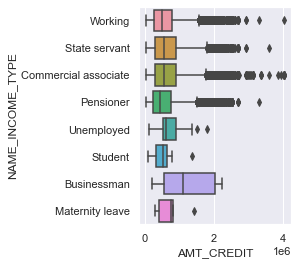

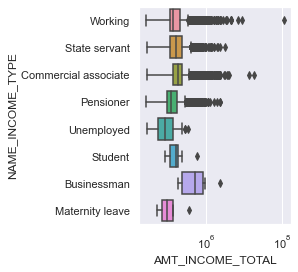

In [141]:
#NAME_INCOME_TYPE & AMT_CREDIT & AMT_INCOME_TOTAL
plt.subplot(1,2,1)
sns.boxplot(data=application_data, y ="NAME_INCOME_TYPE", x= "AMT_CREDIT")
plt.show()
plt.subplot(1,2,2)
sns.boxplot(data=application_data, y ="NAME_INCOME_TYPE", x= "AMT_INCOME_TOTAL")
plt.xscale("log")
plt.show()

### Observation :- Clearly the buisness Income type is dominaing the other buisness types with working which as a verity of range,

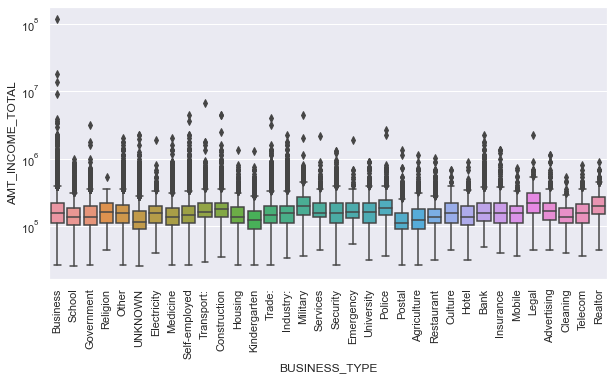

In [142]:
# AMT_INCOME_TOTAL vs Buisness_type
plt.figure(figsize=(10,5))
sns.boxplot(x="BUSINESS_TYPE",y="AMT_INCOME_TOTAL",data=application_data);
plt.yscale("log");
plt.xticks(rotation=90);

In [143]:
application_data.CODE_GENDER.value_counts(normalize=True)*100

F   65.84
M   34.16
Name: CODE_GENDER, dtype: float64

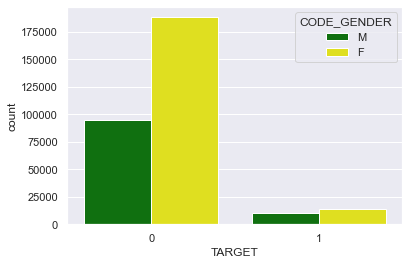

In [144]:
sns.countplot(data=application_data, x ="TARGET", hue = "CODE_GENDER");

### Observation:- Female applicants are more than male applicants

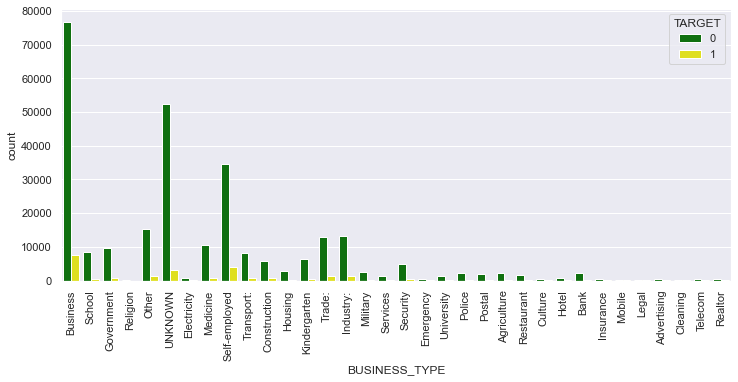

In [145]:
plt.figure(figsize=(12,5))
sns.countplot(data=application_data, x = "BUSINESS_TYPE", hue = "TARGET")
plt.xticks(rotation=90);

### Observation:  Business types are the best target customer followed by Unknown and Self- Employed  

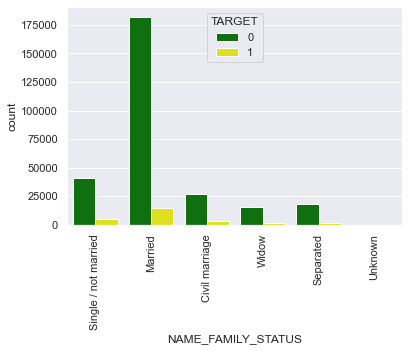

In [146]:
sns.countplot(data=application_data, x = "NAME_FAMILY_STATUS", hue =  "TARGET")
plt.xticks(rotation=90);

### Observation :  Married and Single are top 2 categories to target which has highest no. of Non defaulters

In [147]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEAR_BIRTH', 'YEAR_EMPLOYED',
       'YEAR_ID_PUBLISH', 'YEAR_REGISTRATION', 'BUSINESS_TYPE'],
  

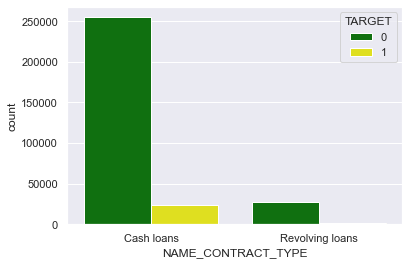

In [148]:
sns.countplot(data = application_data, x = "NAME_CONTRACT_TYPE", hue = "TARGET");

### Observstion:- Cash loans have more non defaulters than revaloving loans 

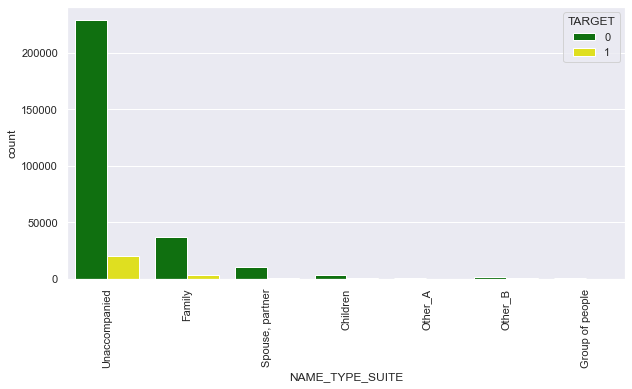

In [149]:
plt.figure(figsize= (10,5))
sns.countplot(data  = application_data, x = "NAME_TYPE_SUITE", hue  = "TARGET")
plt.xticks(rotation = 90);

### Observation:- Unaccompanied and Family have less defaulters than other categorym

In [150]:
application_data.YEAR_BIRTH.describe()

count   307511.00
mean        43.94
std         11.96
min         20.52
25%         34.01
50%         43.15
75%         53.92
max         69.12
Name: YEAR_BIRTH, dtype: float64

In [151]:
round(application_data.YEAR_BIRTH.value_counts(ascending= False))

37.67    43
36.93    42
49.99    41
27.45    41
43.21    40
         ..
68.21     1
68.13     1
21.96     1
68.76     1
68.66     1
Name: YEAR_BIRTH, Length: 17460, dtype: int64

## Binning the age to the indentify best results

In [152]:
bins = [0,20,40,60,80]
slot = ["0-20", "20-40", "40-60", "60-80"]
application_data["AGE_RANGE"] = pd.cut(application_data.YEAR_BIRTH, bins, labels = slot, ordered=False)

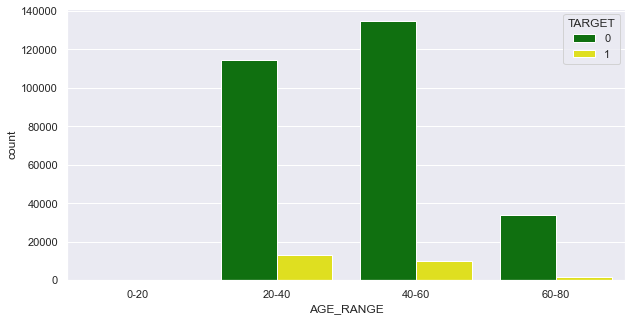

In [153]:
plt.figure(figsize=(10,5))
sns.countplot(data= application_data, x = "AGE_RANGE", hue = "TARGET");

### Observation:- From the AGE_RANGE of 20-40 the defaulters are more as compare to other , however the least defaulter are 40-60 AGE_GROUP has high loan clearence

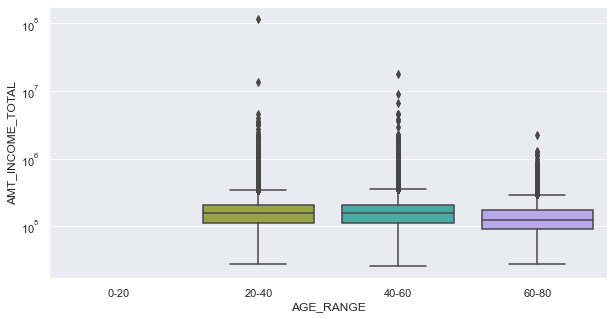

In [154]:
plt.figure(figsize= (10,5))
sns.boxplot(data = application_data, x = "AGE_RANGE", y = "AMT_INCOME_TOTAL")
plt.yscale("log");

### Observation :- The Age Range form 20-40 and 40-60 have nearly same income.

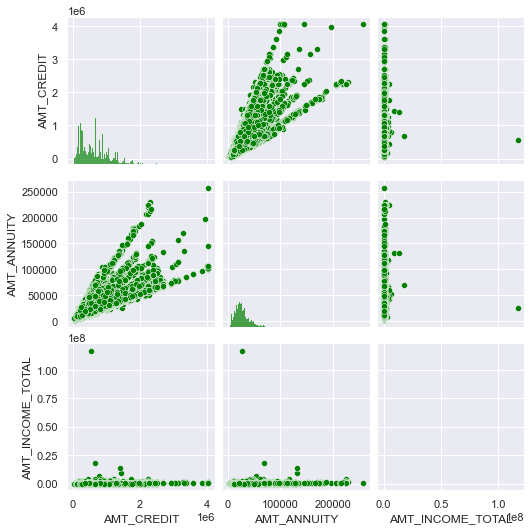

In [155]:
sns.pairplot(data=application_data , vars= ["AMT_CREDIT" ,"AMT_ANNUITY", "AMT_INCOME_TOTAL"]);


### Observation :- 
 1) AMT_CREDIT and AMT_ANNUITY are directly proportional to each other 
 
 2) AMT_INCOME_TOTAL AND AMT_ANNUITY AND AMT_CREDIT there is similar in each chart 

# SEGMENTED VARIABLE 

### Data Imbalance

In [156]:
application_data.TARGET.value_counts(normalize=True)*100

0   91.93
1    8.07
Name: TARGET, dtype: float64

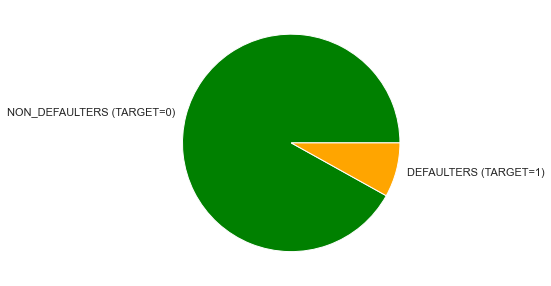

In [157]:
custom_palette = ["#008000", "#FFA500"]
sns.set_palette(custom_palette)
plt.figure(figsize=(10,5))
plt.pie(application_data.TARGET.value_counts(), labels = ['NON_DEFAULTERS (TARGET=0)','DEFAULTERS (TARGET=1)']);

### Observation :- As we can see there is a huge difference in the data 

In [158]:
NON_DEFAULTERS = application_data[application_data.TARGET==0]

In [159]:
DEFAULTERS = application_data[application_data.TARGET==1]

In [160]:
NON_DEFAULTERS.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_ID_PUBLISH,YEAR_REGISTRATION,BUSINESS_TYPE,AGE_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,Core staff,2.00,MONDAY,11,0,0,0,0,0,0,School,828.00,0.00,0.00,0.00,0.00,0.00,0.00,45.93,3.25,0.80,3.25,School,40-60
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,Laborers,1.00,MONDAY,9,0,0,0,0,0,0,Government,815.00,0.00,0.00,0.00,0.00,0.00,0.00,52.18,0.62,6.93,11.67,Government,40-60
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,Laborers,2.00,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,617.00,0.00,0.00,0.00,0.00,0.00,1.00,52.07,8.33,6.68,26.94,Business,40-60
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,Core staff,1.00,THURSDAY,11,0,0,0,0,1,1,Religion,1106.00,0.00,0.00,0.00,0.00,0.00,0.00,54.61,8.32,9.47,11.81,Religion,40-60
5,100008,0,Cash loans,M,N,Y,0,99000.00,490495.50,27517.50,454500.00,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.04,Laborers,2.00,WEDNESDAY,16,0,0,0,0,0,0,Other,2536.00,0.00,0.00,0.00,0.00,1.00,1.00,46.41,4.35,1.31,13.62,Other,40-60


In [161]:
DEFAULTERS.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_ID_PUBLISH,YEAR_REGISTRATION,BUSINESS_TYPE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,Laborers,1.00,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,1134.00,0.00,0.00,0.00,0.00,0.00,1.00,25.92,1.75,5.81,9.99,Business,20-40
26,100031,1,Cash loans,F,N,Y,0,112500.00,979992.00,27076.50,702000.00,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.02,Cooking staff,1.00,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,161.00,0.00,0.00,0.00,0.00,2.00,2.00,51.30,7.20,5.01,18.01,Business,40-60
40,100047,1,Cash loans,M,N,Y,0,202500.00,1193580.00,35028.00,855000.00,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.03,Laborers,2.00,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,1075.00,0.00,0.00,0.00,2.00,0.00,4.00,47.90,3.46,2.82,3.24,Business,40-60
42,100049,1,Cash loans,F,N,N,0,135000.00,288873.00,16258.50,238500.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,Sales staff,2.00,THURSDAY,11,0,0,0,0,0,0,Self-employed,1480.00,0.00,0.00,0.00,0.00,0.00,2.00,36.67,9.85,12.08,0.12,Self-employed,20-40
81,100096,1,Cash loans,F,N,Y,0,81000.00,252000.00,14593.50,252000.00,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.03,Laborers,2.00,THURSDAY,10,0,0,0,0,0,0,UNKNOWN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,67.93,1000.67,11.50,14.77,UNKNOWN,60-80


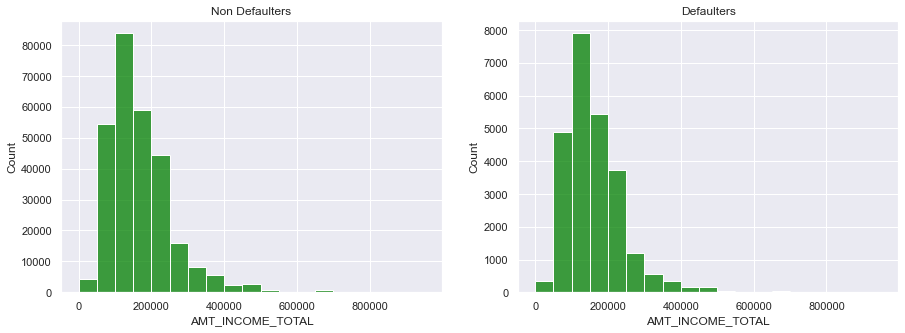

In [162]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
bins=[i for i in range( 0, 1000000, 50000)]
sns.histplot(NON_DEFAULTERS["AMT_INCOME_TOTAL"], bins=bins)
plt.title('Non Defaulters')

plt.subplot(1,2,2)
bins=[i for i in range( 0, 1000000, 50000)]
sns.histplot(DEFAULTERS["AMT_INCOME_TOTAL"], bins=bins)
plt.title('Defaulters');


### Conclusion:-  
No much difference in the two above data the income is maximum for both the target variable as 10000

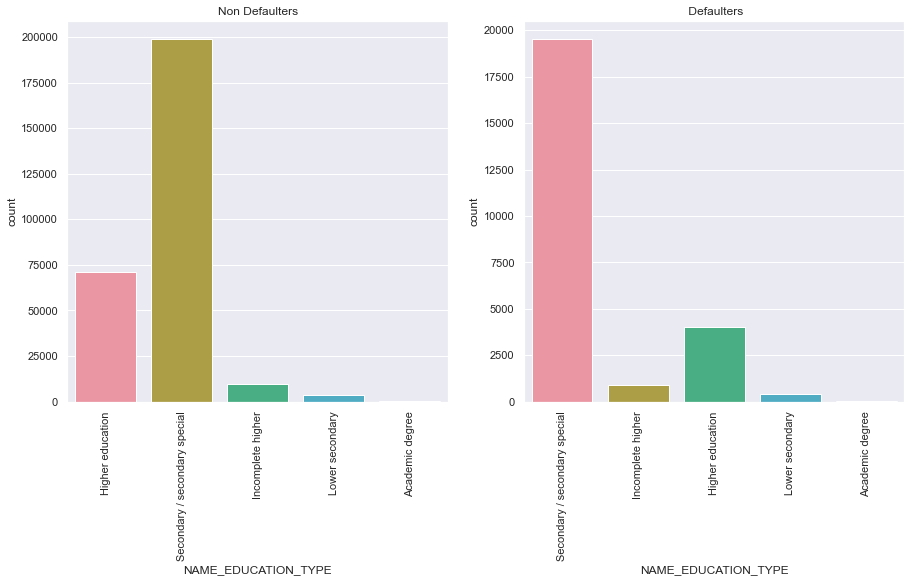

In [163]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(NON_DEFAULTERS["NAME_EDUCATION_TYPE"])
plt.xticks(rotation=90);
plt.title('Non Defaulters')

plt.subplot(1,2,2)
sns.countplot(DEFAULTERS["NAME_EDUCATION_TYPE"])
plt.xticks(rotation=90);
plt.title(' Defaulters');


### Observation:- In the defaulter rate of secondary /secondary special is more in compare to others and Academic degree holders have less defaulters same as non defaulters

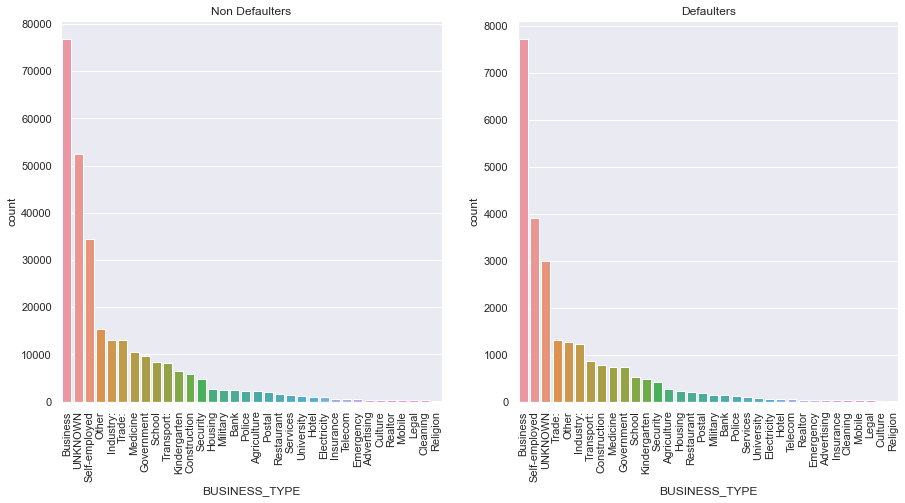

In [164]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(NON_DEFAULTERS["BUSINESS_TYPE"], order=NON_DEFAULTERS["BUSINESS_TYPE"].value_counts().index)
plt.xticks(rotation=90);
plt.title('Non Defaulters')

plt.subplot(1,2,2)
sns.countplot(DEFAULTERS["BUSINESS_TYPE"], order=DEFAULTERS["BUSINESS_TYPE"].value_counts().index)
plt.xticks(rotation=90);
plt.title('Defaulters');


### Observation :-  Top 3 non defaulters and defaluters fall under the same buisness type Buisness , Self Employed and Unknown

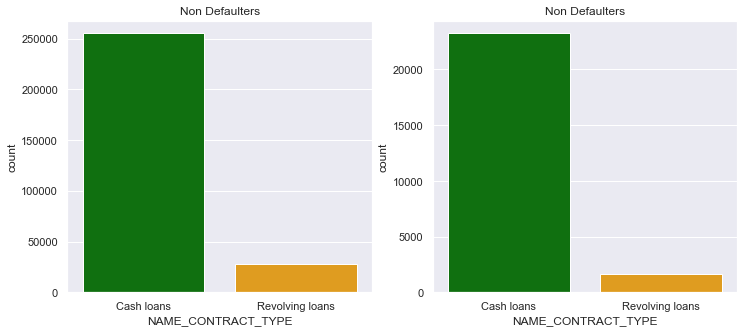

In [165]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(NON_DEFAULTERS["NAME_CONTRACT_TYPE"])
plt.title('Non Defaulters')

plt.subplot(1,2,2)
sns.countplot(x=DEFAULTERS["NAME_CONTRACT_TYPE"])
plt.title('Non Defaulters');

### Observation:- Cash Loans are more in both the cases either Defaulters or non defaulters

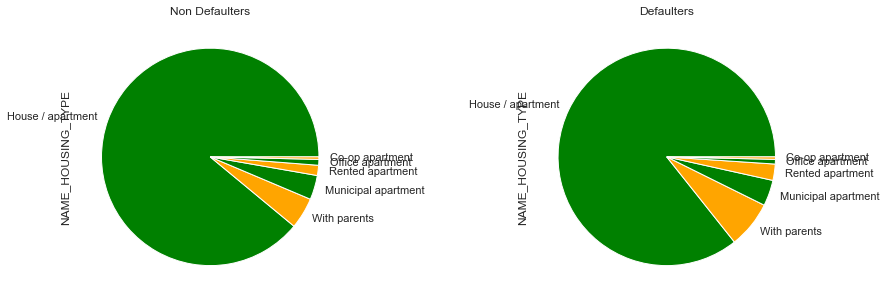

In [166]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

NON_DEFAULTERS["NAME_HOUSING_TYPE"].value_counts(normalize=True).plot.pie(ax=axs[0])
axs[0].set_title('Non Defaulters')

DEFAULTERS["NAME_HOUSING_TYPE"].value_counts(normalize=True).plot.pie(ax=axs[1])
axs[1].set_title('Defaulters')

plt.show()

### Observatioin :-Clients living in a House/Apartments are more likely to apply and repay the loan.

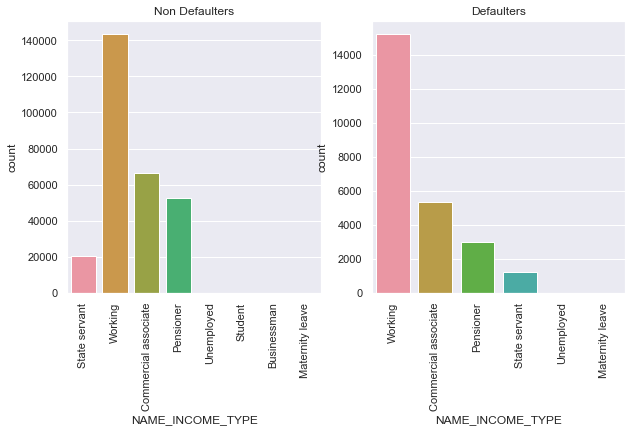

In [167]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(NON_DEFAULTERS["NAME_INCOME_TYPE"])
plt.xticks(rotation=90);
plt.title('Non Defaulters')

plt.subplot(1,2,2)
sns.countplot(DEFAULTERS["NAME_INCOME_TYPE"])
plt.xticks(rotation=90);
plt.title('Defaulters');

### Observation:- Students and Busineesman are no payment defaulty because they are no listed in defaulters category

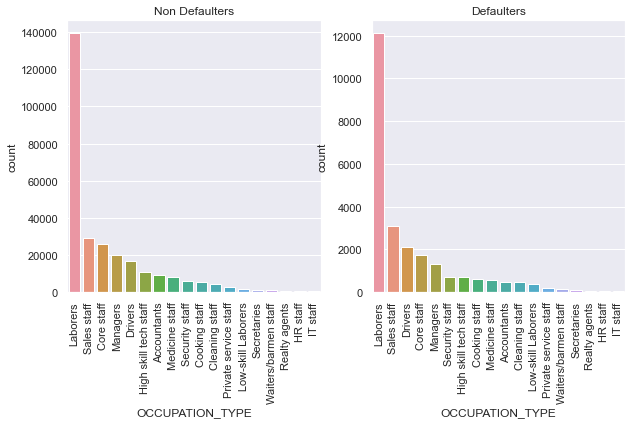

In [168]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(NON_DEFAULTERS["OCCUPATION_TYPE"], order=NON_DEFAULTERS["OCCUPATION_TYPE"].value_counts().index)
plt.xticks(rotation=90);
plt.title('Non Defaulters')

plt.subplot(1,2,2)
sns.countplot(DEFAULTERS["OCCUPATION_TYPE"], order=DEFAULTERS["OCCUPATION_TYPE"].value_counts().index)
plt.xticks(rotation=90);
plt.title('Defaulters');

### Observation:- sales staff, drivers and core staff have more number of defauters as compared to non defaulters rate

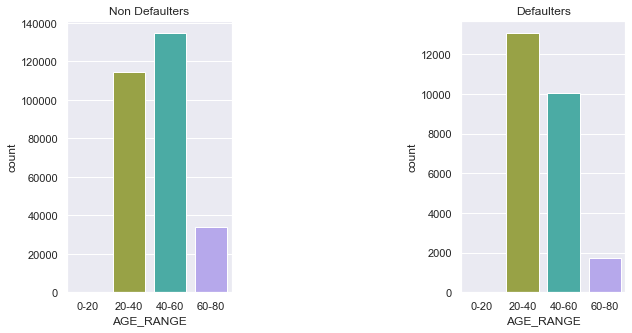

In [169]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(NON_DEFAULTERS["AGE_RANGE"])
plt.title('Non Defaulters')


plt.subplot(1,3,3)
sns.countplot(DEFAULTERS["AGE_RANGE"])
plt.title('Defaulters');


### observation:- The age range of 20-40 have the highest rate of defaulters where as 40-60 have non defaulters

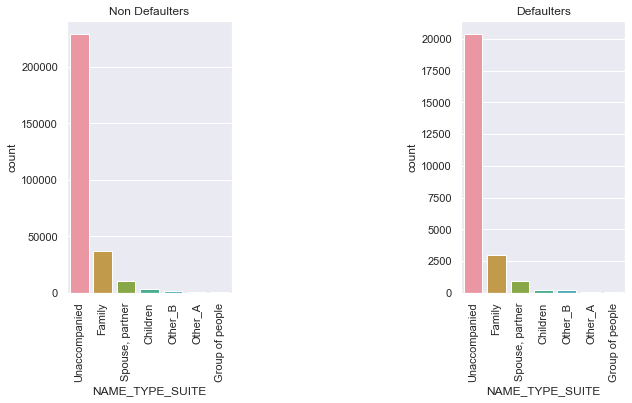

In [170]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x="NAME_TYPE_SUITE",data=NON_DEFAULTERS, order=NON_DEFAULTERS.NAME_TYPE_SUITE.value_counts().index)
plt.title('Non Defaulters')

plt.xticks(rotation=90);
plt.subplot(1,3,3)
sns.countplot(x="NAME_TYPE_SUITE",data=DEFAULTERS, order=DEFAULTERS.NAME_TYPE_SUITE.value_counts().index)
plt.xticks(rotation=90)
plt.title('Defaulters');

### Conlusion:- We observe that the number of unaccompained are more for the  number of defaulters and non defaulters both 

In [171]:
NON_DEFAULTERS.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEAR_BIRTH',
       'YEAR_EMPLOYED', 'YEAR_ID_PUBLISH', 'YEAR_REGISTRATION'],
      dtype='object')

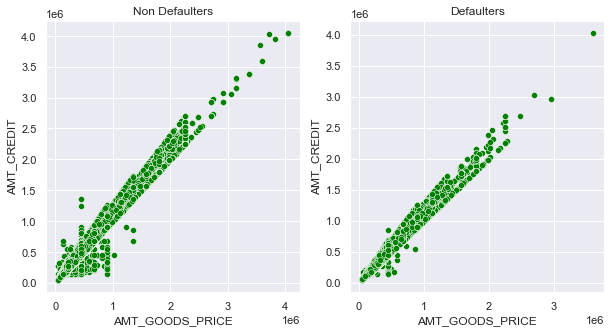

In [172]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x="AMT_GOODS_PRICE",y="AMT_CREDIT",data=NON_DEFAULTERS)
plt.title('Non Defaulters')

plt.subplot(1,2,2)
sns.scatterplot(x="AMT_GOODS_PRICE",y="AMT_CREDIT",data=DEFAULTERS)
plt.title('Defaulters');

### Observation :- It is seen that the Goods Price Increses so the Amt_Credit also increases 

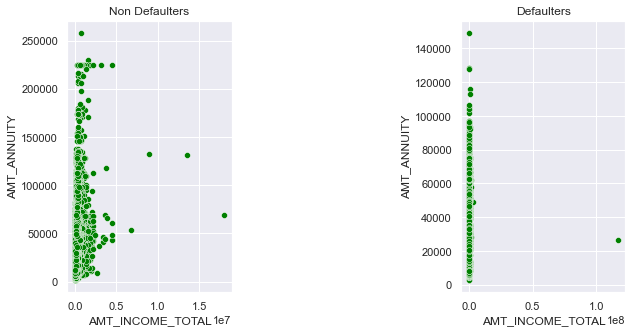

In [173]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.scatterplot(x="AMT_INCOME_TOTAL",y="AMT_ANNUITY",data=NON_DEFAULTERS)
plt.title('Non Defaulters')
plt.subplot(1,3,3)
sns.scatterplot(x="AMT_INCOME_TOTAL",y="AMT_ANNUITY",data=DEFAULTERS)
plt.title('Defaulters');

                                       No clearly understand

# MULTIVARIANTE ANALYSIS

Checking for Co-relation all the numerical at ones

In [174]:
app_heat = application_data.corr()

In [175]:
app_heat.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_ID_PUBLISH,YEAR_REGISTRATION
SK_ID_CURR,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
TARGET,-0.00,1.00,0.02,-0.00,-0.03,-0.01,-0.04,-0.04,0.01,-0.02,0.01,0.01,0.00,0.04,0.05,0.03,-0.06,-0.00,0.00,-0.00,-0.01,-0.01,0.01,-0.08,-0.05,-0.05,-0.04
CNT_CHILDREN,-0.00,0.02,1.00,0.01,0.00,0.02,-0.00,-0.03,0.88,-0.01,-0.01,0.01,0.01,0.02,0.07,0.07,0.01,0.00,0.00,-0.00,-0.01,-0.00,-0.03,-0.33,-0.24,0.03,-0.18
AMT_INCOME_TOTAL,-0.00,-0.00,0.01,1.00,0.16,0.19,0.16,0.07,0.02,0.04,0.03,0.06,0.06,0.00,0.01,0.01,0.02,0.00,0.00,0.00,0.03,0.01,0.02,-0.03,-0.06,-0.01,-0.03
AMT_CREDIT,-0.00,-0.03,0.00,0.16,1.00,0.77,0.99,0.10,0.06,0.05,0.02,0.05,0.05,-0.03,-0.02,0.00,0.07,-0.00,0.01,0.00,0.06,0.02,-0.04,0.06,-0.06,0.01,-0.01


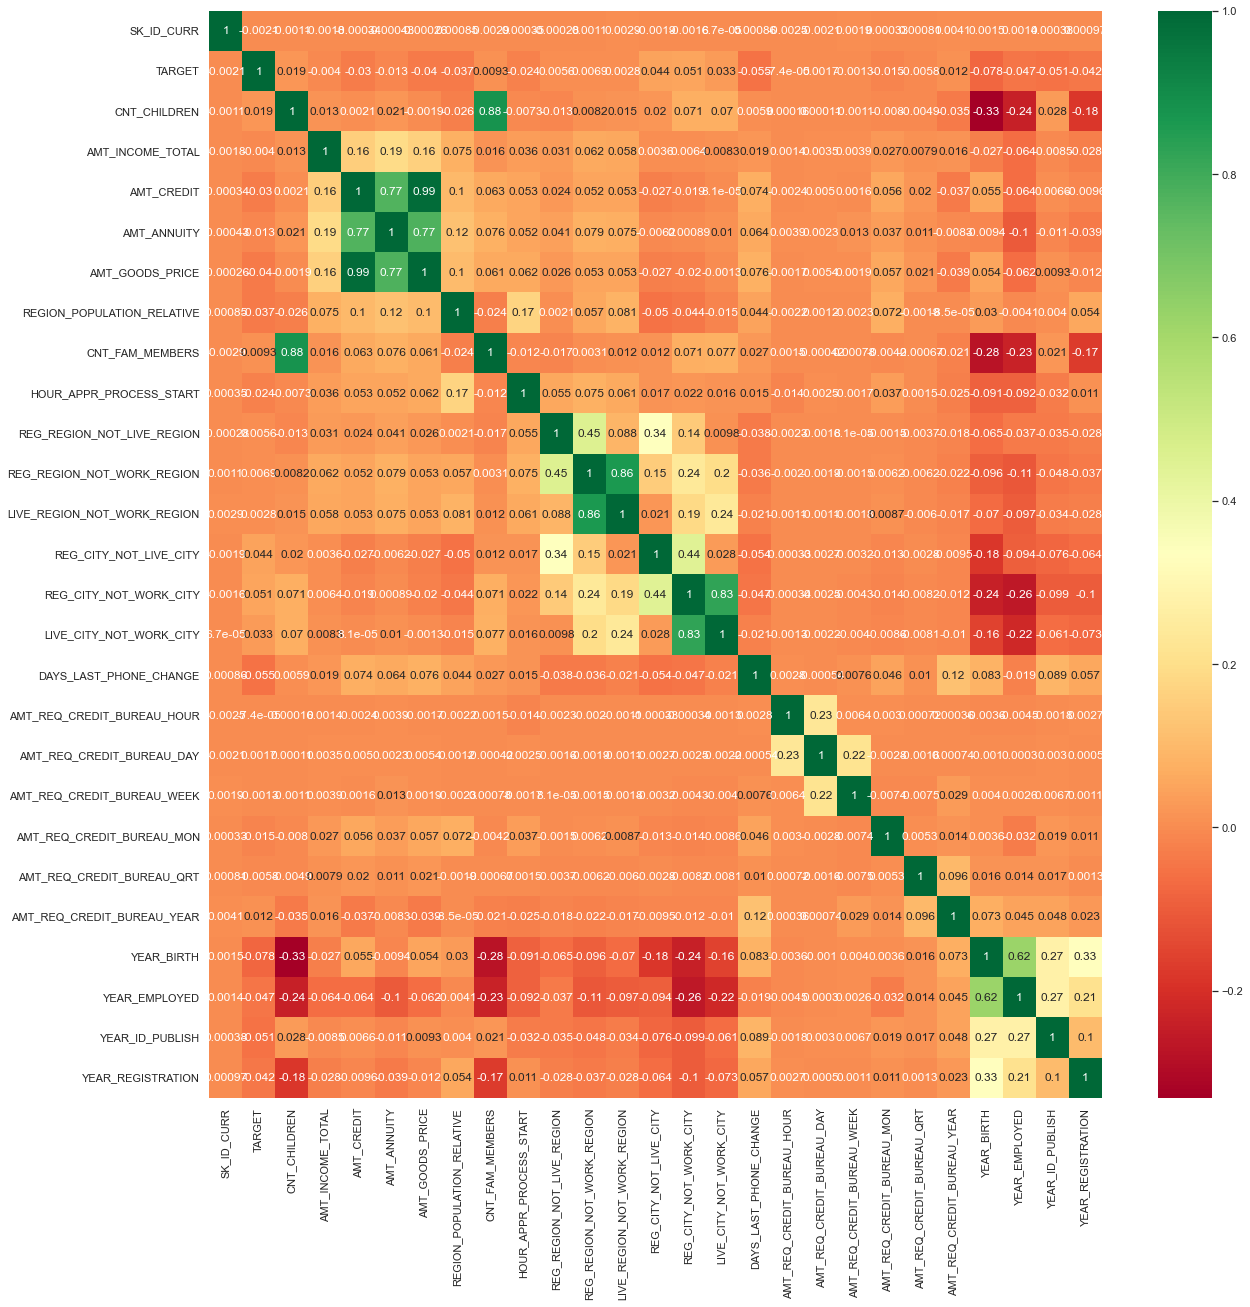

In [176]:
plt.figure(figsize=(20,20))
sns.heatmap(app_heat, cmap="RdYlGn",annot=True);

### Observation:- There is a highly correlation between AMT_CREDIT and AMT_GOODS_PRICE as the heat plot. CNT_CHILDREN and CNT_FARM_MEMBERS have high correlation about 0.88

### --------------------------------------------------------------------------------------------------------------------------------------------------------

# Checking Previous Data

In [177]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,NaN,607500.00,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,NaN,112500.00,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,NaN,450000.00,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,NaN,337500.00,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
previous_application.shape

(1670214, 37)

In [179]:
# Checking the null values
previous_application.isnull().sum().sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

In [180]:
prev_null = (previous_application.isnull().sum().sort_values(ascending = False)/ len(previous_application))*100

In [181]:
prev_null

RATE_INTEREST_PRIVILEGED      99.64
RATE_INTEREST_PRIMARY         99.64
AMT_DOWN_PAYMENT              53.64
RATE_DOWN_PAYMENT             53.64
NAME_TYPE_SUITE               49.12
NFLAG_INSURED_ON_APPROVAL     40.30
DAYS_TERMINATION              40.30
DAYS_LAST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION     40.30
DAYS_FIRST_DUE                40.30
DAYS_FIRST_DRAWING            40.30
AMT_GOODS_PRICE               23.08
AMT_ANNUITY                   22.29
CNT_PAYMENT                   22.29
PRODUCT_COMBINATION            0.02
AMT_CREDIT                     0.00
NAME_YIELD_GROUP               0.00
NAME_PORTFOLIO                 0.00
NAME_SELLER_INDUSTRY           0.00
SELLERPLACE_AREA               0.00
CHANNEL_TYPE                   0.00
NAME_PRODUCT_TYPE              0.00
SK_ID_PREV                     0.00
NAME_GOODS_CATEGORY            0.00
NAME_CLIENT_TYPE               0.00
CODE_REJECT_REASON             0.00
SK_ID_CURR                     0.00
DAYS_DECISION               

In [182]:
previous_drop=prev_null[prev_null>=50].index
previous_drop.tolist()

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT']

In [183]:
previous_application.drop(previous_drop, axis=1, inplace = True)

#### These 4 columns need to be dropped because:
#### 1) FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY" ,These two of the columns are flag variable which has binary values and no relation with the target variable hance can be dropped 
#### 2) WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START", these Two columns have no relation with the target varibale hanced can be dropped 

In [184]:
previous_drop2=["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY"]

In [185]:
previous_application.drop(previous_drop2, axis = 1, inplace = True)

In [186]:
previous_application.isnull().sum().sort_values(ascending=False)/ len(previous_application) * 100

NAME_TYPE_SUITE             49.12
NFLAG_INSURED_ON_APPROVAL   40.30
DAYS_TERMINATION            40.30
DAYS_LAST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION   40.30
DAYS_FIRST_DUE              40.30
DAYS_FIRST_DRAWING          40.30
AMT_GOODS_PRICE             23.08
AMT_ANNUITY                 22.29
CNT_PAYMENT                 22.29
PRODUCT_COMBINATION          0.02
AMT_CREDIT                   0.00
CHANNEL_TYPE                 0.00
NAME_YIELD_GROUP             0.00
NAME_SELLER_INDUSTRY         0.00
SELLERPLACE_AREA             0.00
SK_ID_PREV                   0.00
NAME_PRODUCT_TYPE            0.00
NAME_PORTFOLIO               0.00
SK_ID_CURR                   0.00
NAME_CLIENT_TYPE             0.00
CODE_REJECT_REASON           0.00
NAME_PAYMENT_TYPE            0.00
DAYS_DECISION                0.00
NAME_CONTRACT_STATUS         0.00
NAME_CASH_LOAN_PURPOSE       0.00
AMT_APPLICATION              0.00
NAME_CONTRACT_TYPE           0.00
NAME_GOODS_CATEGORY          0.00
dtype: float64

### Checking data frame , handling missing value and observing outlier

##### Checking for negative value in our data

In [187]:
for column_name,data in previous_application.iteritems():
    print(column_name ," = ",data[0])

SK_ID_PREV  =  2030495
SK_ID_CURR  =  271877
NAME_CONTRACT_TYPE  =  Consumer loans
AMT_ANNUITY  =  1730.43
AMT_APPLICATION  =  17145.0
AMT_CREDIT  =  17145.0
AMT_GOODS_PRICE  =  17145.0
NAME_CASH_LOAN_PURPOSE  =  XAP
NAME_CONTRACT_STATUS  =  Approved
DAYS_DECISION  =  -73
NAME_PAYMENT_TYPE  =  Cash through the bank
CODE_REJECT_REASON  =  XAP
NAME_TYPE_SUITE  =  nan
NAME_CLIENT_TYPE  =  Repeater
NAME_GOODS_CATEGORY  =  Mobile
NAME_PORTFOLIO  =  POS
NAME_PRODUCT_TYPE  =  XNA
CHANNEL_TYPE  =  Country-wide
SELLERPLACE_AREA  =  35
NAME_SELLER_INDUSTRY  =  Connectivity
CNT_PAYMENT  =  12.0
NAME_YIELD_GROUP  =  middle
PRODUCT_COMBINATION  =  POS mobile with interest
DAYS_FIRST_DRAWING  =  365243.0
DAYS_FIRST_DUE  =  -42.0
DAYS_LAST_DUE_1ST_VERSION  =  300.0
DAYS_LAST_DUE  =  -42.0
DAYS_TERMINATION  =  -37.0
NFLAG_INSURED_ON_APPROVAL  =  0.0


# Converting negative data types into positive data types

In [188]:
previous_application["DAYS_DECISION"] = abs(previous_application["DAYS_DECISION"])

In [189]:
previous_application["DAYS_FIRST_DUE"] = abs(previous_application["DAYS_FIRST_DUE"])

In [190]:
previous_application.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

### Replacing XNA and XAP to Unknown and Unknown1 since they are the heighest value it's difficult to perform any kind of analysis

In [191]:
previous_application.NAME_CASH_LOAN_PURPOSE.replace("XNA", "Unknown", inplace = True)

In [192]:
previous_application.NAME_CASH_LOAN_PURPOSE.replace("XAP", "Unknown1", inplace = True)

In [193]:
previous_application.NAME_CASH_LOAN_PURPOSE.value_counts()[:2]

Unknown1    922661
Unknown     677918
Name: NAME_CASH_LOAN_PURPOSE, dtype: int64

In [194]:
# Replacing XNA to unknown
previous_application.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [195]:
previous_application.NAME_CONTRACT_TYPE.replace("XNA", "Unknown", inplace = True)

In [196]:
previous_application.NAME_CLIENT_TYPE.value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [197]:
previous_application.NAME_CLIENT_TYPE.replace("XNA", "Unknown", inplace = True)

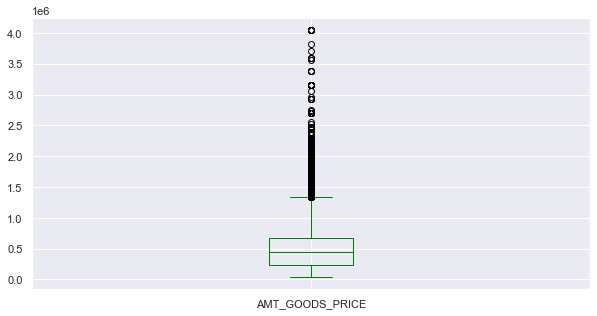

In [198]:
plt.figure(figsize=(10,5))
application_data["AMT_GOODS_PRICE"].plot.box();

Replacing the null values of AMT_GOODS_PRICE with median

In [199]:
application_data["AMT_GOODS_PRICE"].fillna(application_data["AMT_GOODS_PRICE"].median(), inplace = True)

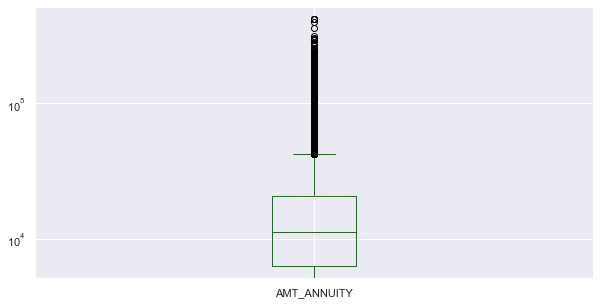

In [200]:
plt.figure(figsize=(10,5))
previous_application["AMT_ANNUITY"].plot.box()  
plt.yscale("log")


Replacing the null values of AMT_ANNUITY with median

In [201]:
previous_application["AMT_ANNUITY"].fillna(previous_application["AMT_ANNUITY"].median(),inplace=True)

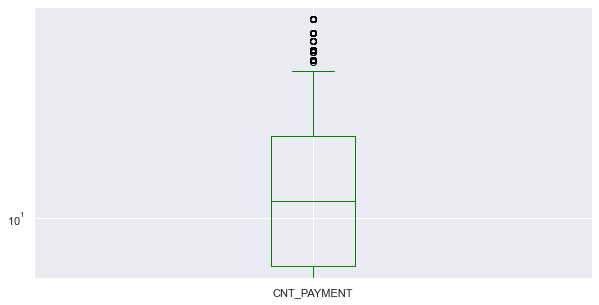

In [202]:
plt.figure(figsize=(10,5))
previous_application["CNT_PAYMENT"].plot.box()
plt.yscale("log")

Replacing the null values of CNT_PAYMENT with median

# UNIVARIATE  ANALYSIS 

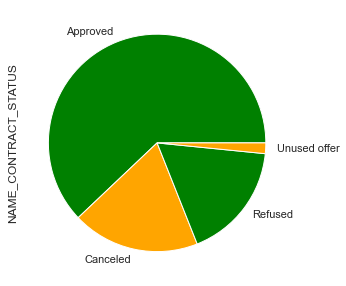

In [203]:
plt.figure(figsize=(10,5))
previous_application["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.pie();

### Observation  :- The rate  of  APPROVAL is higher compare to any othrt type of status.

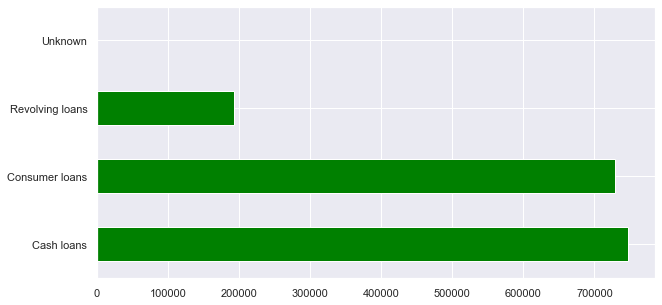

In [204]:
plt.figure(figsize=(10,5))
previous_application["NAME_CONTRACT_TYPE"].value_counts().plot.barh();

### Observation:- The cash loan are more as compare to other

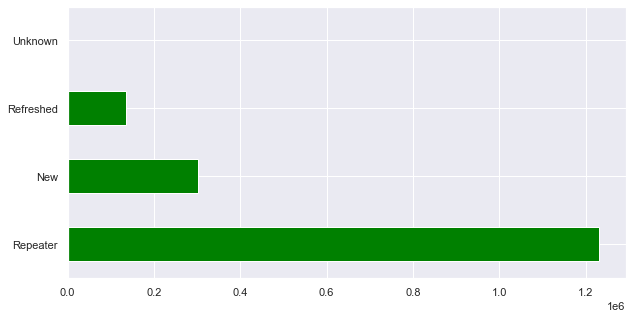

In [205]:
plt.figure(figsize=(10,5))
previous_application["NAME_CLIENT_TYPE"].value_counts().plot.barh();

### Observation :- Repeater clients are more compare to others 

# BIVARIATE ANALYSIS

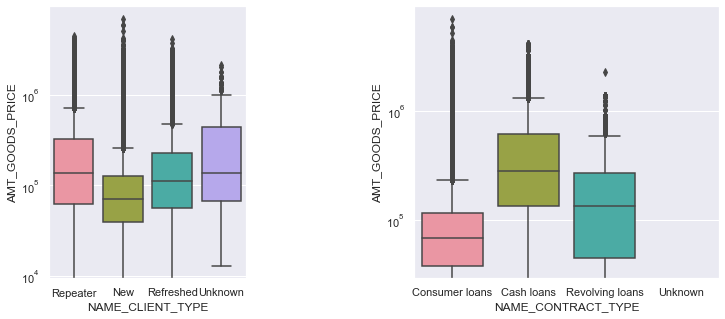

In [206]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.boxplot(data=previous_application, x="NAME_CLIENT_TYPE",y="AMT_GOODS_PRICE")
plt.yscale("log")
plt.subplot(1,2,2)
sns.boxplot(data=previous_application, x="NAME_CONTRACT_TYPE",y="AMT_GOODS_PRICE")
plt.yscale("log");

### Observation :-  Repeaters have the highest AMT_GOODS_PRICE and Cash loans are also more compare to other loans

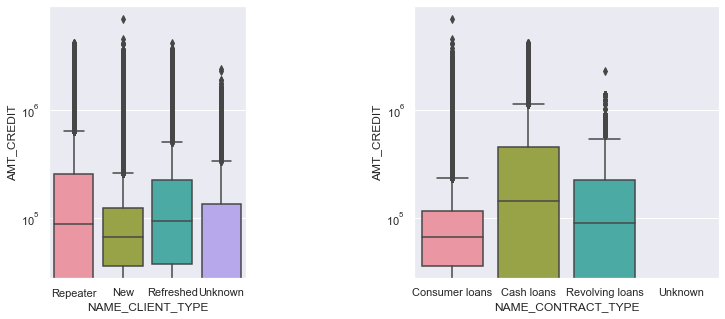

In [207]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.boxplot(data=previous_application, x="NAME_CLIENT_TYPE",y="AMT_CREDIT")
plt.yscale("log")
plt.subplot(1,2,2)
sns.boxplot(data=previous_application, x="NAME_CONTRACT_TYPE",y="AMT_CREDIT")
plt.yscale("log");

### Observation :- Repeaters and Cash loan have the higest value in comparison to AMT_CREDIT

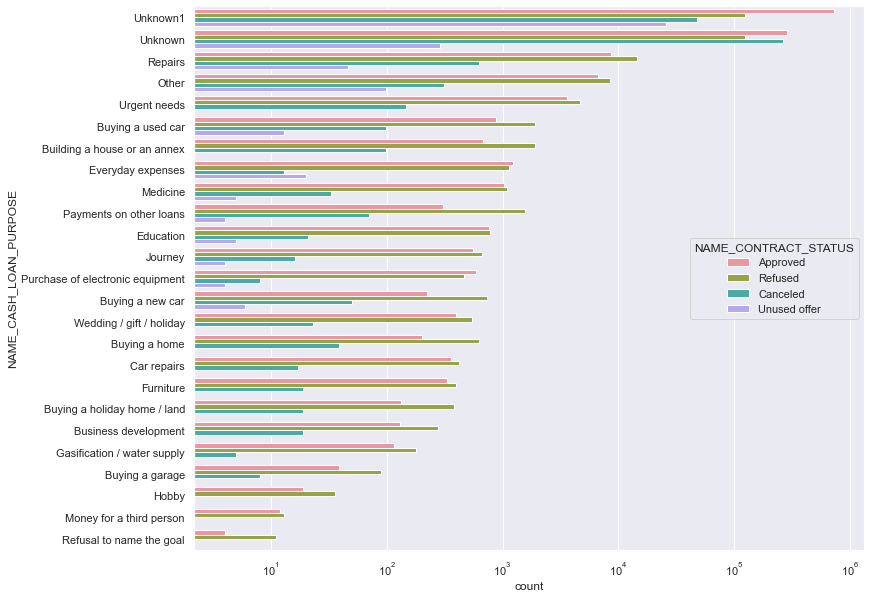

In [208]:
plt.figure(figsize=(12,10))

sns.countplot(data=previous_application, y="NAME_CASH_LOAN_PURPOSE", order=previous_application["NAME_CASH_LOAN_PURPOSE"].value_counts().index
              ,hue="NAME_CONTRACT_STATUS" )      
plt.xscale("log");

### Observation:- The number of refused loans are for repairs purpose and Unknown1 and unknown also very popular

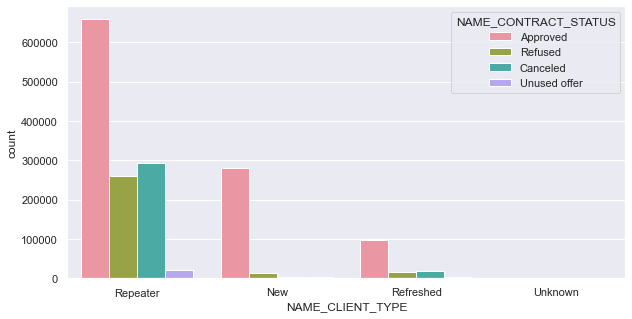

In [209]:
plt.figure(figsize=(10,5))
sns.countplot(x="NAME_CLIENT_TYPE" ,hue="NAME_CONTRACT_STATUS",data=previous_application);

### Observation:- Repeater have high rate of APPROVAL then comes New Clients when compared it with  Repeaters.

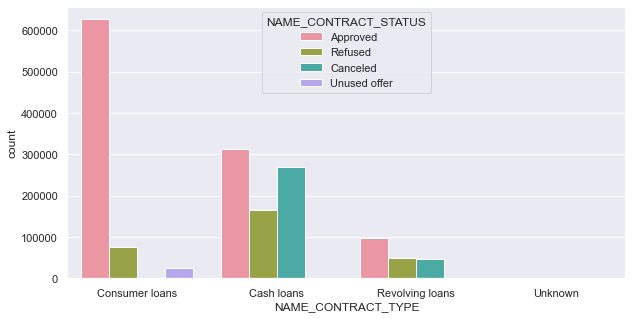

In [210]:
plt.figure(figsize=(10,5))
sns.countplot(data = previous_application, x="NAME_CONTRACT_TYPE" ,hue="NAME_CONTRACT_STATUS");

## Observation :- Consumers Loans have more chances to be approved and cash loans have high Refusal rate

In [211]:
# Categorical data
cat_pre_columns = previous_application.select_dtypes(['object', 'category']).columns
cat_pre_columns

Index(['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

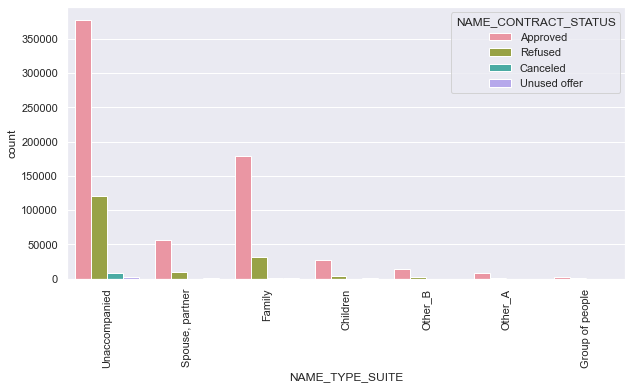

In [212]:
plt.figure(figsize=(10,5))
sns.countplot(data = previous_application, x="NAME_TYPE_SUITE" ,hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90);

### Observation:- Unaccompained and Famliy type are top 2 approval

In [213]:
previous_application.NAME_PRODUCT_TYPE.value_counts()

XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

### Final Points: 
#### 1) The Approval Rate Is Higher Than Any Other Type of Status, 
#### 2) Cash Loans Are More Than Any Other Type of Loans, 
#### 3) Repeaters Are More Than Others, 
#### 4) Repeaters Have the Highest AMT Goods Price Compared to Other Borrowers, and Cash Loans Are More Than Other Loans, #### 5) The Majority of Rejected Loans Are For Repair Purpose.

# MERGING DATA FRAME 

### MERIGNG THE TWO DATA FRAME APPLICATION DATA AND PREVIOUS DATA   ON THE COMMON COLUMN


In [214]:
merged = pd.merge(application_data,previous_application, on= 'SK_ID_CURR', suffixes=('_application', '_Previous'))
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_application,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_application,AMT_ANNUITY_application,AMT_GOODS_PRICE_application,NAME_TYPE_SUITE_application,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_ID_PUBLISH,YEAR_REGISTRATION,BUSINESS_TYPE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_Previous,AMT_ANNUITY_Previous,AMT_APPLICATION,AMT_CREDIT_Previous,AMT_GOODS_PRICE_Previous,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_Previous,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,Laborers,1.00,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,1134.00,0.00,0.00,0.00,0.00,0.00,1.00,25.92,1.75,5.81,9.99,Business,20-40,1038818,Consumer loans,9251.77,179055.00,179055.00,179055.00,Unknown1,Approved,606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.00,low_normal,POS other with interest,365243.00,565.00,125.00,-25.00,-17.00,0.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,Core staff,2.00,MONDAY,11,0,0,0,0,0,0,School,828.00,0.00,0.00,0.00,0.00,0.00,0.00,45.93,3.25,0.80,3.25,School,40-60,1810518,Cash loans,98356.99,900000.00,1035882.00,900000.00,Unknown,Approved,746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,low_normal,Cash X-Sell: low,365243.00,716.00,-386.00,-536.00,-527.00,1.00
2,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,Core staff,2.00,MONDAY,11,0,0,0,0,0,0,School,828.00,0.00,0.00,0.00,0.00,0.00,0.00,45.93,3.25,0.80,3.25,School,40-60,2636178,Consumer loans,64567.67,337500.00,348637.50,337500.00,Unknown1,Approved,828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.00,middle,POS industry with interest,365243.00,797.00,-647.00,-647.00,-639.00,0.00
3,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,Core staff,2.00,MONDAY,11,0,0,0,0,0,0,School,828.00,0.00,0.00,0.00,0.00,0.00,0.00,45.93,3.25,0.80,3.25,School,40-60,2396755,Consumer loans,6737.31,68809.50,68053.50,68809.50,Unknown1,Approved,2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.00,middle,POS household with interest,365243.00,2310.00,-1980.00,-1980.00,-1976.00,1.00
4,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,Laborers,1.00,MONDAY,9,0,0,0,0,0,0,Government,815.00,0.00,0.00,0.00,0.00,0.00,0.00,52.18,0.62,6.93,11.67,Government,40-60,1564014,Consumer loans,5357.25,24282.00,20106.00,24282.00,Unknown1,Approved,815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.00,middle,POS mobile without interest,365243.00,784.00,-694.00,-724.00,-714.00,0.00


In [215]:
merged.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE_application',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_application',
 'AMT_ANNUITY_application',
 'AMT_GOODS_PRICE_application',
 'NAME_TYPE_SUITE_application',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'YEAR_BIRTH',
 'YEAR_EMPLOYED',
 'YEAR_ID_PUBLISH',
 'YEAR_REGISTRATION',
 'BUSINESS_TYPE',
 'AGE_RA

In [216]:
merged.shape

(1413701, 69)

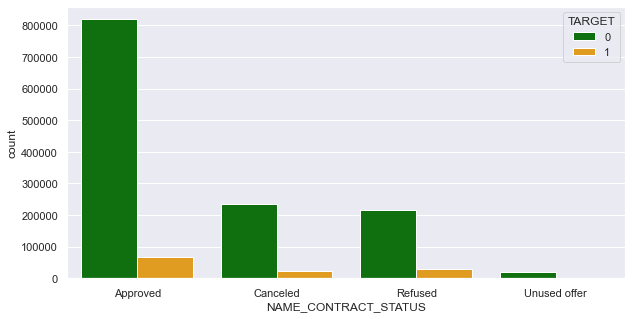

In [217]:
plt.figure(figsize=(10,5))
sns.countplot(data=merged,x="NAME_CONTRACT_STATUS",hue="TARGET");

### Observation :- Approved status  is high  of Non Defaulters

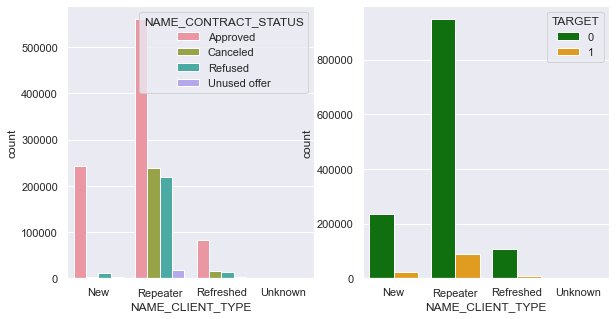

In [218]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)

sns.countplot(data = merged, x="NAME_CLIENT_TYPE",hue="NAME_CONTRACT_STATUS")

plt.subplot(1,3,2)

sns.countplot(data = merged, x="NAME_CLIENT_TYPE",hue="TARGET");

## Observation :- Repeater are more refused as compared to any other considering their Credit history 

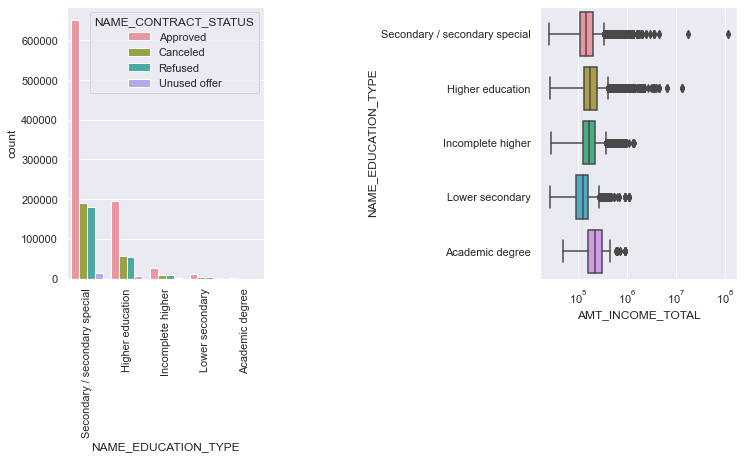

In [219]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.countplot(data = merged, x="NAME_EDUCATION_TYPE", hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90);

plt.subplot(1,3,3)
sns.boxplot(data = merged, x="AMT_INCOME_TOTAL",y="NAME_EDUCATION_TYPE")
plt.xscale("log");

### Observation   :- Secondary Education has the Highest Approval rate ,although the Income of Academic degree holder are more in comparison Secondary education still the approval rate of Secondary Education is more than Academic Degree holders 


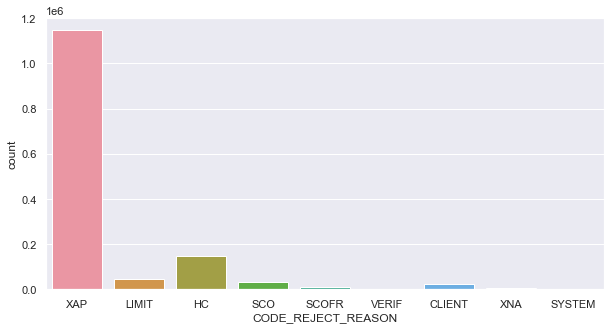

In [220]:
plt.figure(figsize=(10,5))
sns.countplot(merged["CODE_REJECT_REASON"]);

###  Observation :- XAP or Unknown variable has the higher rejection rate

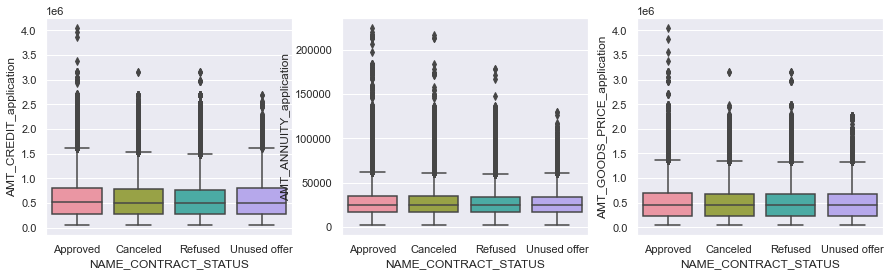

In [221]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(data = merged, x='NAME_CONTRACT_STATUS',y="AMT_CREDIT_application")
plt.subplot(1,3,2)
sns.boxplot(data = merged, x='NAME_CONTRACT_STATUS',y="AMT_ANNUITY_application")
plt.subplot(1,3,3)
sns.boxplot(data = merged, x='NAME_CONTRACT_STATUS',y="AMT_GOODS_PRICE_application");

### Observation  :- FOR AMT_CREDIT_application,AMT_ANNUITY_application,AMT_GOODS_PRICE_application they all have the same value with respect to Contract Status 

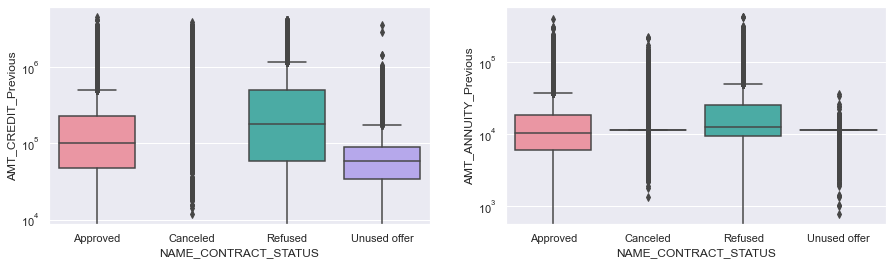

In [222]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(data = merged, x='NAME_CONTRACT_STATUS',y="AMT_CREDIT_Previous")
plt.yscale("log")
plt.subplot(1,2,2)
sns.boxplot(data = merged, x='NAME_CONTRACT_STATUS',y="AMT_ANNUITY_Previous")
plt.yscale("log");

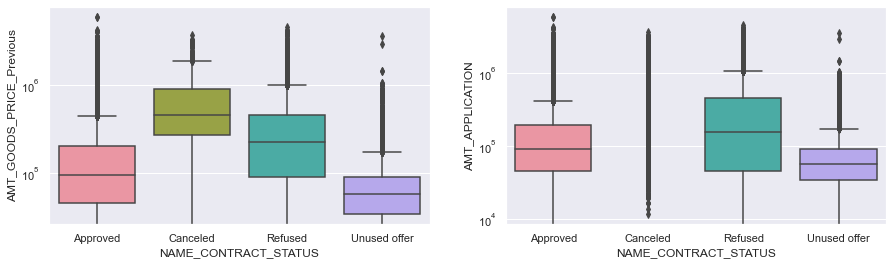

In [223]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.boxplot(data = merged, x='NAME_CONTRACT_STATUS',y="AMT_GOODS_PRICE_Previous")
plt.yscale("log")

plt.subplot(1,2,2)
sns.boxplot(data = merged, x='NAME_CONTRACT_STATUS',y="AMT_APPLICATION")
plt.yscale("log");


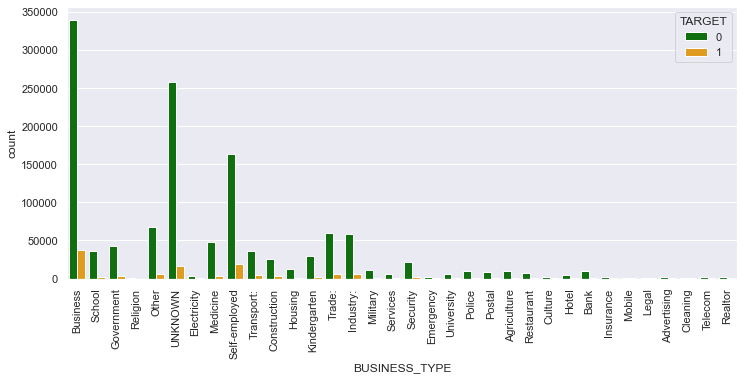

In [224]:
plt.figure(figsize=(12,5))
sns.countplot(data = merged,  x="BUSINESS_TYPE",hue="TARGET")
plt.xticks(rotation=90);

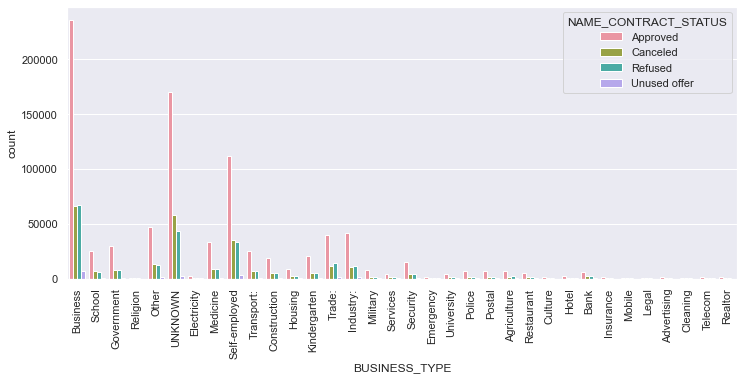

In [225]:
plt.figure(figsize=(12,5))
sns.countplot(data = merged, x="BUSINESS_TYPE",hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90);

###  Observation:- Buisness , Unknown  and Self -Employed are the  top 3 occupation where approval rate is more than any other  occupation

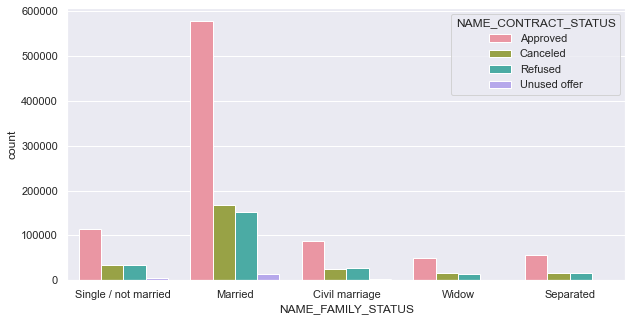

In [226]:
plt.figure(figsize=(10,5))
sns.countplot(data = merged, x="NAME_FAMILY_STATUS",hue="NAME_CONTRACT_STATUS");

### Observation :- Married people are more likely to get Loan approved in comparison to any other maritial status of people.

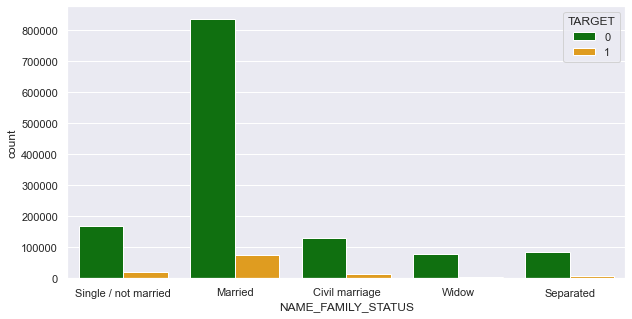

In [227]:
plt.figure(figsize=(10,5))
sns.countplot(data = merged, x="NAME_FAMILY_STATUS",hue="TARGET");

### Observation :- Married people are more likely to get Loan approved in compare to any other maritial status of people.

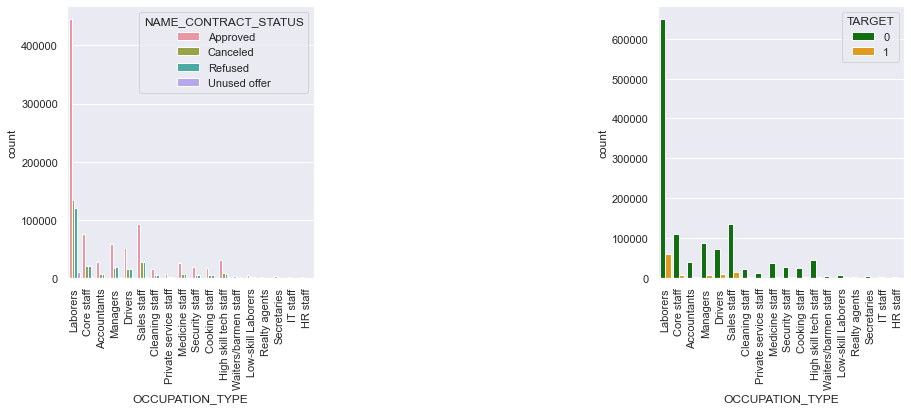

In [228]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)

sns.countplot(data = merged, x="OCCUPATION_TYPE",hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90);
plt.subplot(1,3,3)

sns.countplot(data = merged, x="OCCUPATION_TYPE",hue="TARGET")
plt.xticks(rotation=90);

### Observation :- Laborers,Core Staff and Sales Staff  is the occupation type that has the loan approved and has the higest approval  rate

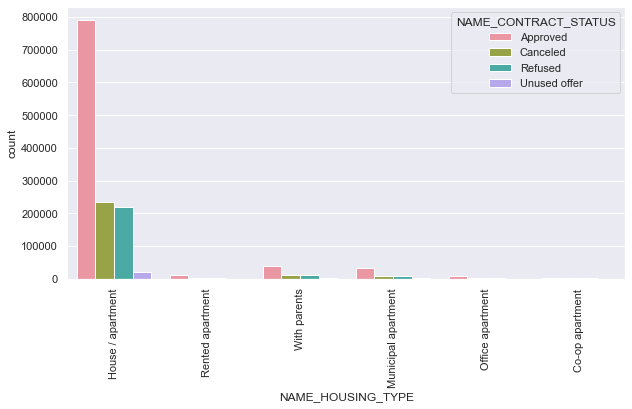

In [229]:
plt.figure(figsize=(10,5))
sns.countplot(data = merged, x="NAME_HOUSING_TYPE",hue="NAME_CONTRACT_STATUS");
plt.xticks(rotation=90);

## Observation:- House/Apartment have the higest approval rate 

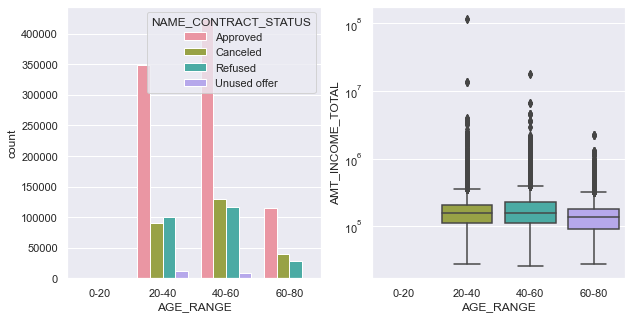

In [230]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data = merged, x="AGE_RANGE",hue="NAME_CONTRACT_STATUS")
plt.subplot(1,2,2)
sns.boxplot(data = merged, x="AGE_RANGE",y="AMT_INCOME_TOTAL")
plt.yscale("log");


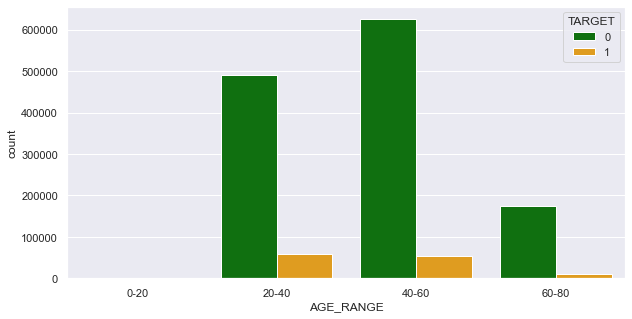

In [231]:
plt.figure(figsize=(10,5))
sns.countplot(data = merged, x="AGE_RANGE",hue="TARGET");

### Observation:- When analyzing the age range , it is noticed that there is not much of difference in the income of people of age range 20-40, 40-60, further more the approval rate of people with age range 40-60 

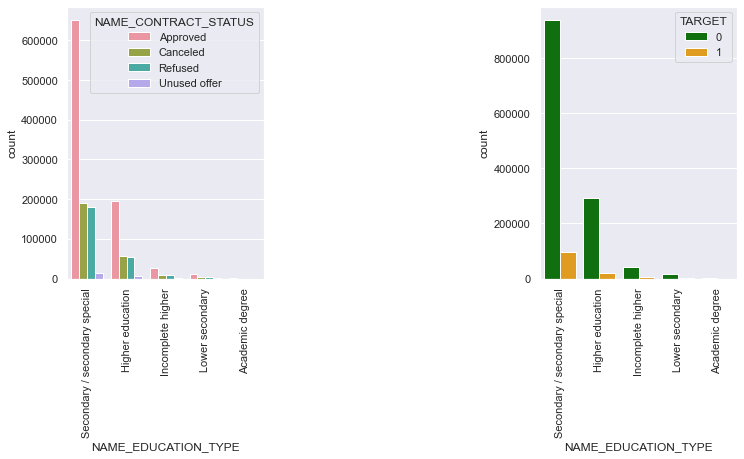

In [232]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)

sns.countplot(data = merged, x="NAME_EDUCATION_TYPE", hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90);
plt.subplot(1,3,3)

sns.countplot(data = merged, x="NAME_EDUCATION_TYPE",hue="TARGET")
plt.xticks(rotation=90);

## FINAL OBSERVATION: 
### "TARGET" is the target variable for the application dataset. ### "NAME_CONTRACT_STATUS" is the target variable for the previous dataset.

#### 1- The age range of 40 to 60 is an excellent target audience because there are less defaulters in this group.
#### 2 The occupations with the highest non-defulter rates include labourers, core employees, and sales personnel.
#### 3) Married persons are more likely to have a loan authorised than people with other marital statuses, making them a strong target market.
#### 4) Secondary education has the highest approval rate. Despite the higher income of academic degree holders in comparison, secondary education still has a higher approval rating.